In [1]:
#To be run from workenvunet

#Combining data from both batches

#Data from only one batch

#Reading full kidney and cysts masks, they can be binary or with 0 and 1

CTDataPath1 = 'E:/AAV para enfermedades renales/CT/Tanda 5 (2021-2022)'
CTDataPath2 = 'E:/AAV para enfermedades renales/CT/Tanda 7 (2022-2023)'        


#There are 4 timesteps. Batch 1 has images in steps 1, 2, 3 and 4. Batch 2 has images in steps 1, 2 and 3

#Number of control and pathological mice in the first batch'
numControlBatch1=1
numPathBatch1=5
#MRIDataPath = 'D:\AAV para enfermedades renales\Imágenes de CT y MR\MRI\Tanda 5 (2021-2022)'    

import tifffile as tiff
from glob import glob as glob
import os
import nrrd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import ndimage

daysCT = glob(CTDataPath1+'/*')

#Extract the number of folders inside the first day being analyzed (first folder alphabetically)
#ordered inside CTDataPath
numMice = len(glob(glob(CTDataPath1+'/*')[0]+'/*'))+len(glob(glob(CTDataPath2+'/*')[0]+'/*'))


controlFullKidneys = np.zeros([len(daysCT),numMice],dtype = int)
fullKidneys = np.zeros([len(daysCT),numMice],dtype = int)

controlCysts = np.zeros([len(daysCT),numMice],dtype = int)
cysts = np.zeros([len(daysCT),numMice],dtype = int)
#This variable will be used to store the number of control mice in the study

for batchPath in [CTDataPath1,CTDataPath2]:
    
    for dayCount,day in enumerate(daysCT):
            
        #If that day is present in the batch
        if len(glob(batchPath+'/*'))>=(dayCount+1):
            dayMice = glob(glob(batchPath+'/*')[dayCount]+'/*')
               
            for mouseCount,mouse in enumerate(dayMice):

                #print('\n')
                print(os.path.basename(mouse))
                
                #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                fullKidneysMaskName = glob(mouse+'/*Corrected*fullKidneysMask*')
                    
                fullKidneysMask = tiff.imread(fullKidneysMaskName[0])
                #Create distance map
                distTransf = ndimage.morphology.distance_transform_edt(1*(fullKidneysMask>0))

                #Calculate total kidneys volume
                totVol=np.sum(1*(fullKidneysMask>0))
                #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                cystsMaskName = glob(mouse+'/*Corrected*cystsMask*')
               
                if cystsMaskName != []:
                    cystsMask = tiff.imread(cystsMaskName[0])
                    totDisVol=np.sum(1*(cystsMask>0))
                    #Mean distance transform values within the cysts 
                    distWeightedtotDisVol = np.sum(distTransf[cystsMask>0])/np.count_nonzero(distTransf[cystsMask>0])
                    #print(distWeightedtotDisVol)
                #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               
                #num will be defined now to set a position to store data inside the matrix
                mouseData = re.split('RATON',os.path.basename(fullKidneysMaskName[0]),flags=re.IGNORECASE)

                #If we are in the first batch
                if batchPath == CTDataPath1 and mouseData[1][0]!='_':

                    ide = mouseData[1][0]  
                    num=int(ide)

                    print('num: ',num)
                   
                    #If we are at the control
                    if num == 1:
                       controlFullKidneys[dayCount,0] = totVol
                       controlCysts[dayCount,0] = totDisVol

                    else:
                       fullKidneys[dayCount,num-2] = totVol
                       cysts[dayCount,num-2] = totDisVol


                    
                #Else, if you are in the second batch, with different structures for the names                           
                elif batchPath == CTDataPath2 and (not mouseData[1][0]!='_'):
                    #Else, pick the identifier (like C1), and then the number inside it
                    ide=mouseData[1].split('_')[1]
                    num = int(ide[1])
                    #If it is C1 or C2
                    if ide=='C2':
                       controlFullKidneys[dayCount,numControlBatch1] = totVol
                       controlCysts[dayCount,numControlBatch1] = totDisVol
                    
                    #C1 is not really a control
                    elif ide =='C1':
                       fullKidneys[dayCount,numPathBatch1+5] = totVol
                       cysts[dayCount,numPathBatch1+5] = totDisVol   
                    else:
                       fullKidneys[dayCount,numPathBatch1+num-1] = totVol
                       cysts[dayCount,numPathBatch1+num-1] = totDisVol                        

                print(num)


              
            #print('fullKidneys ')
            #print(fullKidneys)
            
            #print('controlFullKidneys ')
            #print(controlFullKidneys)
            
            #print('cysts[:,:] ')
            #print(cysts[:,:])
        
            #print('controlCysts[:,:] ')
            #print(controlCysts[:,:])
            
#Remove all-zero columns
fullKidneys = fullKidneys[:,~np.all(fullKidneys == 0, axis = 0)]

controlFullKidneys = controlFullKidneys[:,~np.all(controlFullKidneys == 0, axis = 0)]

cysts = cysts[:,~np.all(cysts == 0, axis = 0)] 

controlCysts = controlCysts[:,~np.all(controlCysts == 0, axis = 0)]

print('fullKidneys')
print(fullKidneys)

print('controlFullKidneys')
print(controlFullKidneys)

print('cysts')
print(cysts)
        
print('controlCysts')
print(controlCysts)

TROPISMORENAL_RATON1_2I1D_26NOV21_26Nov2021_Acq001_ring


C:\Users\equipo\AppData\Local\Temp\ipykernel_1744\1474101032.py:61: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  distTransf = ndimage.morphology.distance_transform_edt(1*(fullKidneysMask>0))


num:  1
1
TROPISMORENAL_RATON2_1D_26NOV21_26Nov2021_Acq001_ring
num:  2
2
TROPISMORENAL_RATON3_1I_26NOV21_26Nov2021_Acq001_ring
num:  3
3
TROPISMORENAL_RATON4_2D_26NOV21_26Nov2021_Acq001_ring
num:  4
4
TROPISMORENAL_RATON5_2I_26NOV21_26Nov2021_Acq001_ring
num:  5
5
TROPISMORENAL_RATON6_1D1I_26NOV21_26Nov2021_Acq001_ring
num:  6
6
TROPISMORENAL_RATON1_2D1I_10DIC21_10Dec2021_Acq001_ring
num:  1
1
TROPISMORENAL_RATON2_1D_10DIC21_10Dec2021_Acq001_ring
num:  2
2
TROPISMORENAL_RATON3_1I_10DIC21_10Dec2021_Acq001_ring
num:  3
3
TROPISMORENAL_RATON4_2D_10DIC21_10Dec2021_Acq001_ring
num:  4
4
TROPISMORENAL_RATON5_2I_10DIC21_10Dec2021_Acq001_ring
num:  5
5
TROPISMORENAL_RATON6_1D1I_10DIC21_10Dec2021_Acq001_ring
num:  6
6
TROPISMORENAL_RATON1_2D1I_23DIC21_23Dec2021_Acq001_ring
num:  1
1
TROPISMORENAL_RATON2_1D_23DIC21_23Dec2021_Acq001_ring
num:  2
2
TROPISMORENAL_RATON4_2D_23DIC21_23Dec2021_Acq001_ring
num:  4
4
TROPISMORENAL_RATON5_2I_23DIC21_23Dec2021_Acq001_ring
num:  5
5
TROPISMORENAL_RATON6_1

C:\Users\equipo\AppData\Local\Temp\ipykernel_16004\1880743890.py:83: RuntimeWarning: divide by zero encountered in log
  mediansFit = np.polyfit(xAxisVals, np.log(fullKidneyMedians), 1, w=np.sqrt(fullKidneyMedians))
C:\Users\equipo\.conda\envs\workenvpy3.9\lib\site-packages\numpy\lib\polynomial.py:663: RuntimeWarning: invalid value encountered in multiply
  rhs *= w


LinAlgError: SVD did not converge in Linear Least Squares

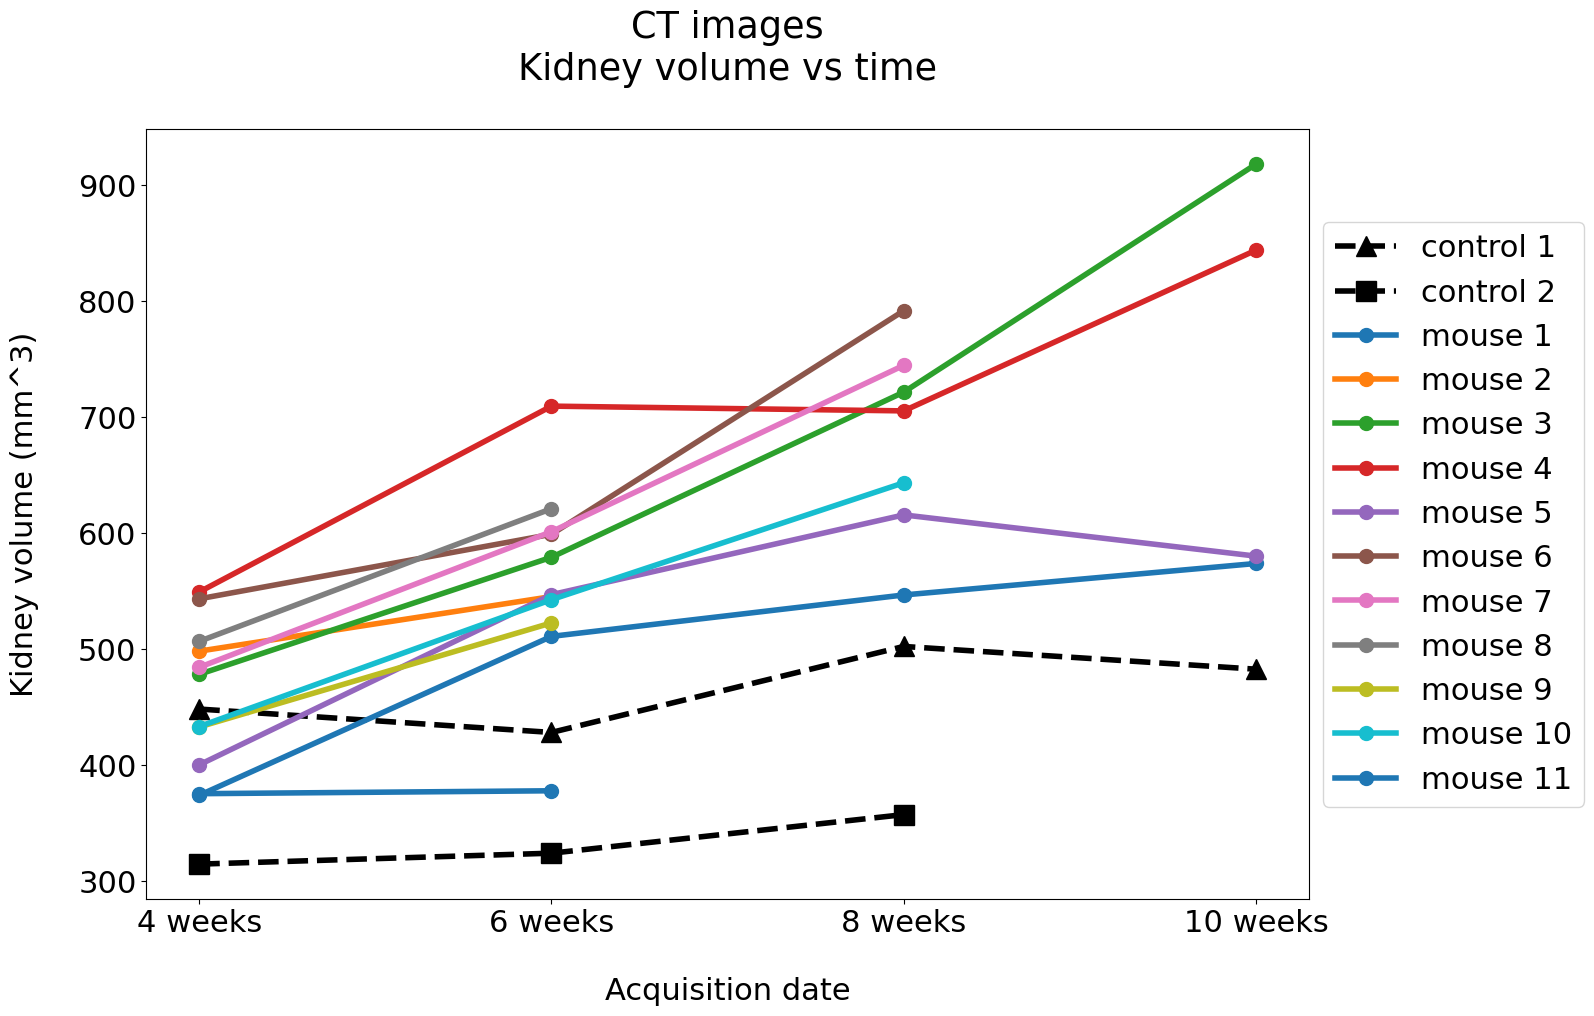

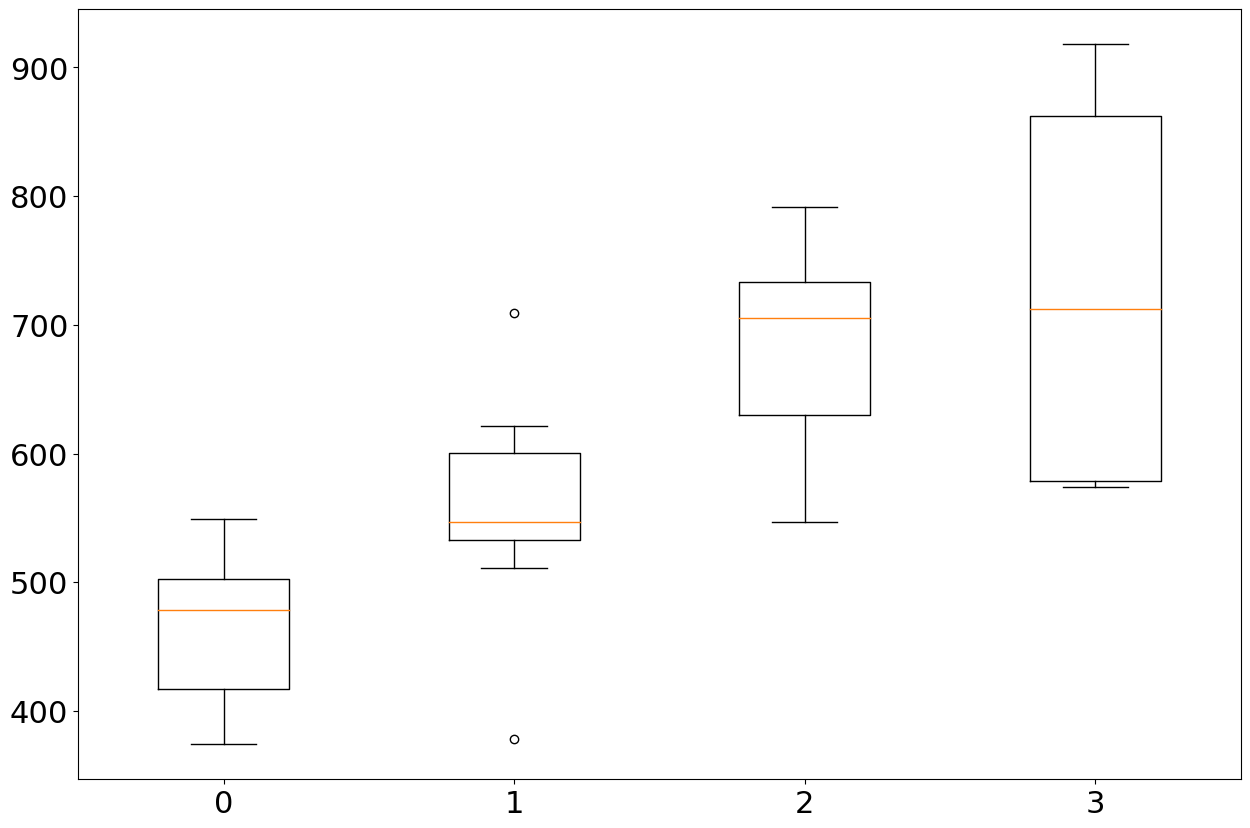

In [27]:
#PLOTS VERSION 1 

#Plotting CT data from both batches (requires the previous cell to have been run)


#Folder to save the figures
figuresFolder = 'E:/AAV para enfermedades renales/Publications/CT+MRI+Histology/Images/NewGraphs/CT'

saving = False

from scipy.optimize import curve_fit
from scipy.stats import f_oneway
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
#################################################################################


#Markers for the control mice
markers = ['^','s']

#Voxel size = (0.122 mm)^3 = 0.0018 mm^3
voxSize = 0.0018

#Change the color of all fonts in the plots
fontColor = 'black'
mpl.rcParams['text.color'] = fontColor
mpl.rcParams['axes.labelcolor'] = fontColor
mpl.rcParams['xtick.color'] = fontColor
mpl.rcParams['ytick.color'] = fontColor

#Change font size
font = {'family': 'sans-serif',
        'weight' : 'light',
        'size'   : 22}



plt.rc('font', **font)





plt.figure(figsize=(15,10))


for mouse in range(controlFullKidneys.shape[1]):
    lab = 'control ' + str(mouse+1)
    color='black'
    data = controlFullKidneys[:,mouse]
    data=data[data!=0]
    plt.plot(voxSize*data,label=lab,marker=markers[mouse],color='black',linestyle='dashed',\
             linewidth=4,markersize=15)
    
for mouse in range(fullKidneys.shape[1]):
    lab = 'mouse ' + str(mouse+1)
    data = fullKidneys[:,mouse]
    data=data[data!=0]
    plt.plot(voxSize*data,label=lab,marker='o', linewidth=4,markersize=10)

plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.title('CT images\nKidney volume vs time\n')
plt.ylabel('Kidney volume (mm^3)\n')
plt.xlabel('\nAcquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['4 weeks','6 weeks','8 weeks','10 weeks'])
if saving is True:
    plt.savefig(figuresFolder+'/CT_Kidney_volume_vs_time.png',bbox_inches='tight')


plt.figure(figsize=(15,10))
fullKidneyMedians = np.zeros(fullKidneys.shape[0])
for i in range(len(fullKidneyMedians)):
    fullKidneyMedians[i] = np.median(voxSize*fullKidneys[i,fullKidneys[0,:]!=0])

fullKidneys_dict = {'4 weeks':voxSize*fullKidneys[0,fullKidneys[0,:]!=0],\
                    '6 weeks':voxSize*fullKidneys[1,fullKidneys[1,:]!=0],\
                    '8 weeks':voxSize*fullKidneys[2,fullKidneys[2,:]!=0],\
                    '10 weeks':voxSize*fullKidneys[3,fullKidneys[3,:]!=0]}

plt.boxplot(fullKidneys_dict.values(),positions=range(0,len(fullKidneys_dict)))

xAxisVals = np.array([0,1,2,3])
mediansFit = np.polyfit(xAxisVals, np.log(fullKidneyMedians), 1, w=np.sqrt(fullKidneyMedians))
a = np.exp(mediansFit[1])
b = mediansFit[0]
x_fitted = np.linspace(np.min(xAxisVals), np.max(xAxisVals), 100)
y_fitted = a * np.exp(b * x_fitted)

for mouse in range(controlFullKidneys.shape[1]):

    lab = 'control ' + str(mouse+1)
    color='black'
    data = controlFullKidneys[:,mouse]
    data=data[data!=0]
    plt.plot(voxSize*data,label=lab,marker=markers[mouse],linestyle='dashed',\
             color='black', linewidth=4,markersize=15)

plt.plot(x_fitted,y_fitted,label='Exponential fit\nto the medians',color = 'purple',linewidth=4)  
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(1.32, 0.5))
plt.ylabel('Kidney volume (mm^3)\n')
plt.xlabel('\nAcquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['4 weeks','6 weeks','8 weeks','10 weeeks'])
plt.title('CT images\nKidney volume boxplots vs time\nANOVA p-value: '+str(anovaResFullKidneys[1].astype('float16')))
if saving is True:
    plt.savefig(figuresFolder+'/CT_Kidney_volume_boxplots_vs_time.png',bbox_inches='tight')


#?????????????????????????????????

df = pd.DataFrame({k: pd.Series(v) for k, v in fullKidneys_dict.items()})


#Perform ANOVA on the full kidney volumes
groups =  [voxSize*i[np.logical_not(np.isnan(i))] for i in fullKidneys_dict.values()]
anovaResFullKidneys = f_oneway(*groups)
#anovaRes = pg.rm_anova(data=df,dv='volume',within='time',subject='id',detailed =True)
#post_hncs = pg.pairwise_ttests(dv='volume',within='time',subject='id',padjust='fdr_bh',data=df)

#anovaRes = pg.rm_anova(df,detailed=False)


print(anovaRes)

#post_hncs = pg.pairwise_ttests(data=df)


#post_hncs = df.pairwise_ttests()

#print(post_hncs)
#?????????????????????????????????




#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Plotting cyst volumes

#cystVolumes = (cysts/fullKidneys)
#cystVolumes = np.divide(cysts, fullKidneys, out=np.zeros_like(cysts,dtype=float), where=fullKidneys!=0)

cystVolumes = voxSize*cysts

plt.figure(figsize=(15,10))

for mouse in range(cystVolumes.shape[1]):
    lab = 'mouse ' + str(mouse+1)
    #Diseased proportion
    data = cystVolumes[:,mouse]
    data=data[data!=0]
    plt.plot(data,label=lab, marker='o',linewidth=4,markersize=10)

plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.title('CT images\nDiseased volume vs time\n')
plt.ylabel('Diseased volume (mm^3)\n')
plt.xlabel('\nAcquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['4 weeks','6 weeks','8 weeks','10 weeks'])
if saving is True:
    plt.savefig(figuresFolder+'/CT_Diseased_volume_vs_time.png',bbox_inches='tight')


plt.figure(figsize=(15,10))

cystMedians = np.zeros(cystVolumes.shape[0])
for i in range(len(cystMedians)):
    cystMedians[i] = np.median(cystVolumes[i,cystVolumes[i,:]!=0])

cysts_dict = {'Initial time':cystVolumes[0,cystVolumes[0,:]!=0],\
              '2 weeks':cystVolumes[1,cystVolumes[1,:]!=0],\
              '4 weeks':cystVolumes[2,cystVolumes[2,:]!=0],\
              '6 weeks':cystVolumes[3,cystVolumes[3,:]!=0]}
plt.boxplot(cysts_dict.values(),positions=range(0,len(cysts_dict)))


#Perform ANOVA for the cysts
groups =  [i[np.logical_not(np.isnan(i))] for i in cysts_dict.values()]
anovaResCysts = f_oneway(*groups)
print('anovaResCysts: ',anovaResCysts)


xAxisVals = np.array([0,1,2,3])
mediansFit = np.polyfit(xAxisVals, np.log(cystMedians), 1, w=np.sqrt(cystMedians))
a = np.exp(mediansFit[1])
b = mediansFit[0]
x_fitted = np.linspace(np.min(xAxisVals), np.max(xAxisVals), 100)
y_fitted = a * np.exp(b * x_fitted)
plt.plot(x_fitted,y_fitted,label='Exponential fit\nto the medians',color = 'purple',linewidth=4)  

plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(1.32, 0.5))

plt.ylabel('Diseased volume (mm^3)\n')
plt.xlabel('\nAcquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['4 weeks','6 weeks','8 weeks','10 weeks'])
plt.title('CT images\nDiseased volume boxplots vs time\nANOVA p-value: '+str(anovaResCysts[1].astype('float16')))
if saving is True:
    plt.savefig(figuresFolder+'/CT_Diseased_volume_boxplots_vs_time.png',bbox_inches='tight')


plt.show()
       




anovaResFullKidneys:  F_onewayResult(statistic=12.61957846381048, pvalue=1.8662639123712662e-05)
anovaResFullKidneys pathological vs control (4 weeks):  F_onewayResult(statistic=302.5861652838368, pvalue=2.374817347753996e-09)
anovaResFullKidneys 4 weeks vs 6 weeks:  F_onewayResult(statistic=9.978025015324251, pvalue=0.004938914048487339)
anovaResFullKidneys pathological vs control (6 weeks):  F_onewayResult(statistic=484.5857212346968, pvalue=1.905512557180467e-10)
anovaResFullKidneys 6 weeks vs 8 weeks:  F_onewayResult(statistic=9.240208555251154, pvalue=0.0078038264017856514)
anovaResFullKidneys pathological vs control (8 weeks):  F_onewayResult(statistic=190.7670930343632, pvalue=2.462094066019169e-06)
anovaResFullKidneys 8 weeks vs 10 weeks:  F_onewayResult(statistic=0.37944665561777574, pvalue=0.5531574802111737)
anovaResFullKidneys pathological vs control (10 weeks):  F_onewayResult(statistic=1806299.7730146246, pvalue=9.084167624895651e-10)



anovaResCysts:  F_onewayResult(sta

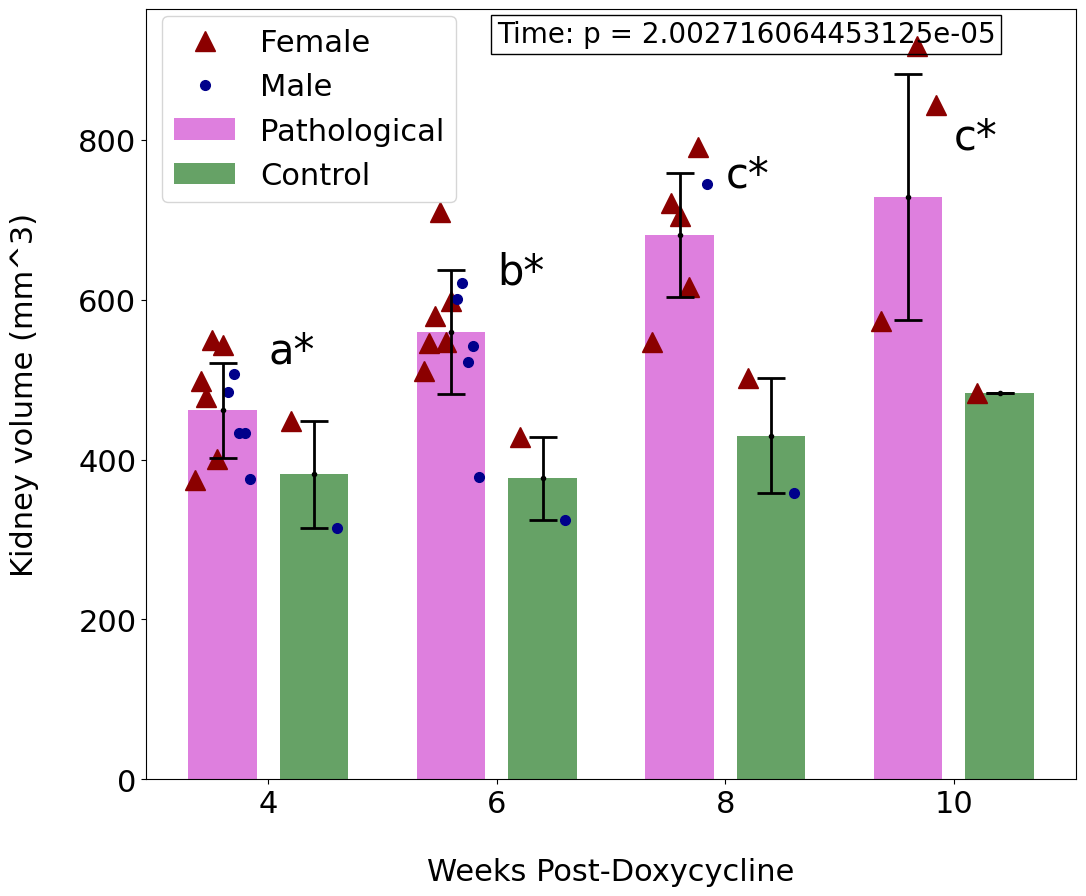

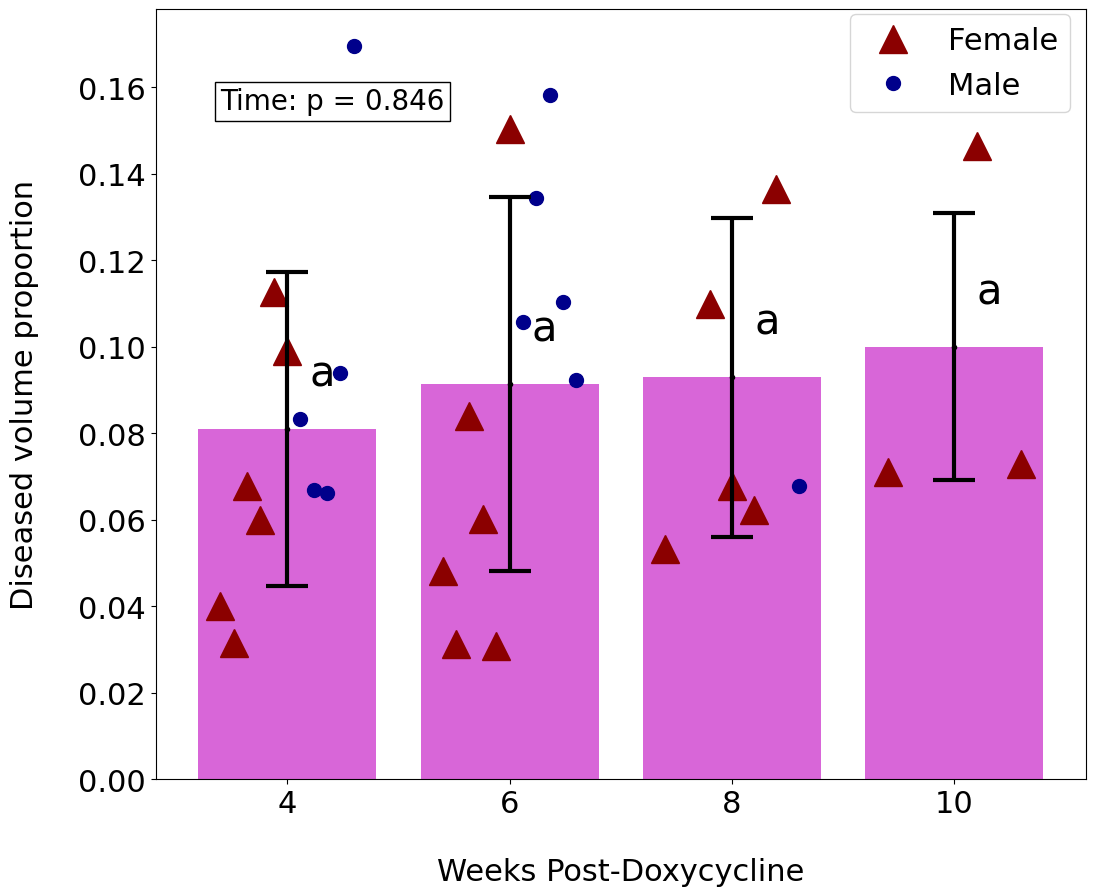

In [57]:
#PLOTS VERSION 2 (similar to Rafa's)

#Plotting CT data from both batches (requires the previous cell to have been run)


#Folder to save the figures
figuresFolder = 'E:/AAV para enfermedades renales/Publications/CT+MRI+Histology/Images/NewGraphs/CT'

saving = True

from scipy.optimize import curve_fit
from scipy.stats import f_oneway
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
#################################################################################


#Transparency of the bars
alphaValue = 0.6

#Markers for the control mice
markers = ['^','s']

#Voxel size = (0.122 mm)^3 = 0.0018 mm^3
voxSize = 0.0018

#Change the color of all fonts in the plots
fontColor = 'black'
mpl.rcParams['text.color'] = fontColor
mpl.rcParams['axes.labelcolor'] = fontColor
mpl.rcParams['xtick.color'] = fontColor
mpl.rcParams['ytick.color'] = fontColor

#Change font size
font = {'family': 'sans-serif',
        'weight' : 'light',
        'size'   : 22}



plt.rc('font', **font)
plt.figure(figsize=(12,10))
#Parameter to control how separated are pathological from control bars
sideOffset = 0.2
#Parameter to control the width of each individual bar
barWidth1 = 0.3

fullKidneyMeans = np.zeros(fullKidneys.shape[0])
fullKidneyStd = np.zeros(fullKidneys.shape[0])
for i in range(len(fullKidneyMeans)):
    fullKidneyMeans[i] = np.mean(voxSize*fullKidneys[i,fullKidneys[i,:]!=0])
    fullKidneyStd[i] = np.std(voxSize*fullKidneys[i,fullKidneys[i,:]!=0])
    #Plot points around i
    numPoints = np.sum(fullKidneys[i,:]!=0)
    pointPosit = (i-sideOffset) + np.linspace(-0.12,0.12,numPoints)
    #plt.plot(pointPosit,voxSize*fullKidneys[i,fullKidneys[i,:]!=0],'.',ms = 14,color = 'darkred')

    #Plot the points separated by female (first batch) and male (second batch)
    for j in range(numPoints):
        
        #If it is one of the females
        if voxSize*fullKidneys[i,j]!=0 and j<=5:
            if j == 0 and i == 0:
                labelName = 'Female'
            else:
                labelName = ''
        
            plt.plot(pointPosit[j],voxSize*fullKidneys[i,j],'^',ms = 14,color = 'darkred',label = labelName)
        elif voxSize*fullKidneys[i,j]!=0 and j>5:
            if j == 6 and i == 0:
                labelName = 'Male'
            else:
                labelName = ''

            plt.plot(pointPosit[j],voxSize*fullKidneys[i,j],'.',ms = 14,color = 'darkblue',label = labelName) 
    
fullKidneys_dict = {'4 weeks':voxSize*fullKidneys[0,fullKidneys[0,:]!=0],\
                    '6 weeks':voxSize*fullKidneys[1,fullKidneys[1,:]!=0],\
                    '8 weeks':voxSize*fullKidneys[2,fullKidneys[2,:]!=0],\
                    '10 weeks':voxSize*fullKidneys[3,fullKidneys[3,:]!=0]}


#plt.boxplot(fullKidneys_dict.values(),positions=range(0,len(fullKidneys_dict)))




controlFullKidneyMeans = np.zeros(controlFullKidneys.shape[0])
controlFullKidneyStd = np.zeros(controlFullKidneys.shape[0])

for i in range(len(controlFullKidneyMeans)):
    controlFullKidneyMeans[i] = np.mean(voxSize*controlFullKidneys[i,controlFullKidneys[i,:]!=0])
    controlFullKidneyStd[i] = np.std(voxSize*controlFullKidneys[i,controlFullKidneys[i,:]!=0])
    
    #Plot points around i
    numPoints = np.sum(controlFullKidneys[i,:]!=0)
    pointPosit = (i+sideOffset) + np.linspace(-0.10,0.10,numPoints)
    #plt.plot(pointPosit,voxSize*controlFullKidneys[i,controlFullKidneys[i,:]!=0],'.',ms = 14,color = 'darkgreen')

    #Plot the points separated by female (first batch) and male (second batch)
    for j in range(numPoints):
        
        #If it is one of the females
        if voxSize*controlFullKidneys[i,j]!=0 and j<=0:

            plt.plot(pointPosit[j],voxSize*controlFullKidneys[i,j],'^',ms = 14,color = 'darkred')
            
        elif voxSize*controlFullKidneys[i,j]!=0 and j>0:
            
            plt.plot(pointPosit[j],voxSize*controlFullKidneys[i,j],'.',ms = 14,color = 'darkblue') 
    

    
controlFullKidneys_dict = {'4 weeks':voxSize*controlFullKidneys[0,controlFullKidneys[0,:]!=0],\
                    '6 weeks':voxSize*controlFullKidneys[1,controlFullKidneys[1,:]!=0],\
                    '8 weeks':voxSize*controlFullKidneys[2,controlFullKidneys[2,:]!=0],\
                    '10 weeks':voxSize*controlFullKidneys[3,controlFullKidneys[3,:]!=0]}
    


    
    
#Perform ANOVA on the full kidney volumes
groups =  [voxSize*i for i in fullKidneys_dict.values()]
anovaResFullKidneys = f_oneway(*groups)

controlGroup = [i for i in controlFullKidneys_dict.values()]

anovaResFullKidneys = f_oneway(*groups)
print('anovaResFullKidneys: ',anovaResFullKidneys)

anovaResPath_Control0 = f_oneway(*[groups[0],controlGroup[0]])
print('anovaResFullKidneys pathological vs control (4 weeks): ',anovaResPath_Control0)
anovaResFullKidneys0_1 = f_oneway(*[groups[0],groups[1]])
print('anovaResFullKidneys 4 weeks vs 6 weeks: ',anovaResFullKidneys0_1)



anovaResPath_Control1 = f_oneway(*[groups[1],controlGroup[1]])
print('anovaResFullKidneys pathological vs control (6 weeks): ',anovaResPath_Control1)
anovaResFullKidneys1_2 = f_oneway(*[groups[1],groups[2]])
print('anovaResFullKidneys 6 weeks vs 8 weeks: ',anovaResFullKidneys1_2)

anovaResPath_Control2 = f_oneway(*[groups[2],controlGroup[2]])
print('anovaResFullKidneys pathological vs control (8 weeks): ',anovaResPath_Control2)
anovaResFullKidneys2_3 = f_oneway(*[groups[2],groups[3]])
print('anovaResFullKidneys 8 weeks vs 10 weeks: ',anovaResFullKidneys2_3)

anovaResPath_Control3 = f_oneway(*[groups[3],controlGroup[3]])
print('anovaResFullKidneys pathological vs control (10 weeks): ',anovaResPath_Control3)

txtString = 'Time: p = {}'.format(np.round(anovaResFullKidneys[1].astype('float16'),5))
plt.text(1, 950, txtString,  fontsize=20, verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black'))


#print(anovaRes)    


#anovaRes = pg.rm_anova(data=df,dv='volume',within='time',subject='id',detailed =True)
#post_hncs = pg.pairwise_ttests(dv='volume',within='time',subject='id',padjust='fdr_bh',data=df)

#anovaRes = pg.rm_anova(df,detailed=False)

#PLOTTING the bar diagram

xAxisPoints = np.array([0,1,2,3])


plt.bar(xAxisPoints-sideOffset,fullKidneyMeans,color='m',width = barWidth1,alpha=0.5,label = 'Pathological')
plt.errorbar(xAxisPoints-sideOffset,fullKidneyMeans,fullKidneyStd,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')

plt.bar(xAxisPoints+sideOffset,controlFullKidneyMeans,color='darkgreen',width = barWidth1,alpha=alphaValue,label = 'Control')
plt.errorbar(xAxisPoints+sideOffset,controlFullKidneyMeans,controlFullKidneyStd,fmt='.',elinewidth=2,capthick=2,errorevery=1,capsize = 10,color='black')


upOffset = 60

plt.text(xAxisPoints[0], fullKidneyMeans[0]+upOffset , 'a*', fontsize = 30)
plt.text(xAxisPoints[1], fullKidneyMeans[1]+upOffset , 'b*', fontsize = 30)
plt.text(xAxisPoints[2], fullKidneyMeans[2]+upOffset , 'c*', fontsize = 30)
plt.text(xAxisPoints[3], fullKidneyMeans[3]+upOffset , 'c*', fontsize = 30)



    
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.35,0.87))
plt.ylabel('Kidney volume (mm^3)\n')
plt.xlabel('\nWeeks Post-Doxycycline')
plt.xticks(ticks=[0,1,2,3],labels=['4','6','8','10'])

if saving is True:
    plt.savefig(figuresFolder+'/CT_Kidney_volume_bars_vs_time.png',bbox_inches='tight')


#Plotting cyst volumes

#cystVolumes = (cysts/fullKidneys)

#Cyst volumes is actually cyst proportions in this case
cystVolumes = np.divide(cysts, fullKidneys, out=np.zeros_like(cysts,dtype=float), where=fullKidneys!=0)

#cystVolumes = voxSize*cysts

plt.figure(figsize=(12,10))

#Parameter to control the width of each individual bar
barWidth2 = 0.8

cystMeans = np.zeros(cystVolumes.shape[0])
cystStd = np.zeros(cystVolumes.shape[0])
for i in range(len(cystMeans)):

    cystMeans[i] = np.mean(cystVolumes[i,cystVolumes[i,:]!=0])
    cystStd[i] = np.std(cystVolumes[i,cystVolumes[i,:]!=0])
    
    #Plot points around i
    numPoints = np.sum(cystVolumes[i,:]!=0)
    pointPosit = i+ np.linspace(-0.3,0.3,numPoints)
    
    #plt.plot(pointPosit,cystVolumes[i,cystVolumes[i,:]!=0],'.',ms = 20,color = 'darkred')

    #Plot the points separated by female (first batch) and male (second batch)
    for j in range(numPoints):
        
        #If it is one of the females
        if cystVolumes[i,j]!=0 and j<=5:
            if j == 0 and i == 0:
                labelName = 'Female'
            else:
                labelName = ''
            plt.plot(pointPosit[j],cystVolumes[i,j],'^',ms = 20,color = 'darkred',label=labelName)
        elif cystVolumes[i,j]!=0 and j>5:
            if j == 6 and i == 0:
                labelName = 'Male'
            else:
                labelName = ''
            plt.plot(pointPosit[j],cystVolumes[i,j],'.',ms = 20,color = 'darkblue',label=labelName) 
        
    
cysts_dict = {'4 weeks':cystVolumes[0,cystVolumes[0,:]!=0],\
              '6 weeks':cystVolumes[1,cystVolumes[1,:]!=0],\
              '8 weeks':cystVolumes[2,cystVolumes[2,:]!=0],\
              '10 weeks':cystVolumes[3,cystVolumes[3,:]!=0]}



#Perform ANOVA for the cysts
groups =  [i for i in cysts_dict.values()]


print('\n\n')
anovaResCysts = f_oneway(*groups)
print('anovaResCysts: ',anovaResCysts)

anovaResCysts0_1 = f_oneway(*[groups[0],groups[1]])
print('anovaResCysts 4 weeks vs 6 weeks: ',anovaResCysts0_1)

anovaResCysts1_2 = f_oneway(*[groups[1],groups[2]])
print('anovaResCysts 6 weeks vs 8 weeks: ',anovaResCysts1_2)

anovaResCysts2_3 = f_oneway(*[groups[2],groups[3]])
print('anovaResCysts 8 weeks vs 10 weeks: ',anovaResCysts2_3)


#Plotting the bar diagram
xAxisPoints = np.array([0,1,2,3])

plt.bar(xAxisPoints,cystMeans,color='m',width = barWidth2,alpha=alphaValue)
plt.errorbar(xAxisPoints,cystMeans,cystStd,fmt='.',elinewidth=3,capthick=3,errorevery=1,capsize = 15,color='black')


upOffset = 0.01
rightOffset = 0.1

plt.text(xAxisPoints[0]+rightOffset, cystMeans[0]+upOffset , 'a', fontsize = 30)
plt.text(xAxisPoints[1]+rightOffset, cystMeans[1]+upOffset , 'a', fontsize = 30)
plt.text(xAxisPoints[2]+rightOffset, cystMeans[2]+upOffset , 'a', fontsize = 30)
plt.text(xAxisPoints[3]+rightOffset, cystMeans[3]+upOffset , 'a', fontsize = 30)
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(1,0.93))

txtString = 'Time: p = {:.3f}'.format(anovaResCysts[1])
plt.text(-0.3, 0.16, txtString,  fontsize=20, verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black'))

plt.ylabel('Diseased volume proportion\n')
plt.xlabel('\nWeeks Post-Doxycycline')
plt.xticks(ticks=[0,1,2,3],labels=['4','6','8','10'])

if saving is True:
    plt.savefig(figuresFolder+'/CT_Diseased_volume_bars_vs_time.png',bbox_inches='tight')


plt.show()
       





In [15]:
#Obtaining measures for all the MRI cysts

MRIDataPath1 = 'E:/AAV para enfermedades renales/Imagenes de CT y MR/MRI/Tanda 5 (2021-2022)/'
MRIDataPath2 = 'E:/AAV para enfermedades renales/Imagenes de CT y MR/MRI/Tanda 7 (2022-2023)/'


import tifffile as tiff
from glob import glob as glob
import os
import nrrd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import ndimage
import copy

#There are 4 timesteps. Batch 1 has images in steps 3 and 4. Batch 2 has images in steps 1, 2 and 3

#Number of pathological and control mice in batch 1
numControlBatch1=1
numPathBatch1=5

numCysts = np.zeros([4,len(glob(MRIDataPath1+'/*')[0])+len(glob(MRIDataPath2+'/*')[0])],dtype=np.int16)
totAreaCysts = np.zeros([4,len(glob(MRIDataPath1+'/*')[0])+len(glob(MRIDataPath2+'/*')[0])],dtype=np.int16)

daysMRI = glob(MRIDataPath1+'/*')+glob(MRIDataPath2+'/*')

for count,i  in enumerate(daysMRI):
    daysMRI[count]=int(os.path.basename(daysMRI[count]).split(' - ')[0])

daysMRI = list(set(daysMRI))
                                        
                                        
for numBatch,batchPath in enumerate([MRIDataPath1,MRIDataPath2]):
        
        print('Batch ',numBatch+1) 
                                        
        dayFolders = glob(batchPath+'/*')
        
        dayNumbers = copy.deepcopy(dayFolders)
        
        for count,i in enumerate(dayNumbers):
            dayNumbers[count]= int(os.path.basename(dayFolders[count]).split(' - ')[0])
        #print(dayNumbers)
                                        
        for dayCount in daysMRI:
            print('Day ',dayCount)
            
            #If that day is present in the batch
            
            dayIndex = dayNumbers.index(dayCount) if dayCount in dayNumbers else -1
            
            if dayIndex!=-1:
                dayMice = glob(dayFolders[dayIndex]+'/*')
               
                for mouseCount,mouse in enumerate(dayMice):
                    #print('mouse: ',os.path.basename(mouse))
                    
                    
                    mouseData = re.split('RATON',os.path.basename(mouse),flags=re.IGNORECASE)
                    #If we are in the first batch
                    if batchPath == MRIDataPath1:
                        
                        #print('First Batch')
                        ide = mouseData[1][1]  
                        num=int(ide)

                        #print('num: ',num)

                        #If we are not at the control
                        if num != 1:
                            
                            cystsMaskName = glob(mouse+'/*cystsMask*.tif')
                            #print('cystsMaskName: ',os.path.basename(cystsMaskName[0]))
                            if cystsMaskName != []:
                                cystsMask = tiff.imread(cystsMaskName[0])
                                numCystsMouse = len(np.unique(cystsMask[cystsMask>0]))
                                totAreaCystsMouse = np.sum(cystsMask>0)
                            
                            else:
                                numCystsMouse = 0
                                totAreaCystsMouse = 0
                                
                            #print('numCystsMouse: ',numCystsMouse)
                            #print('numCysts: ',numCysts)
                            numCysts[dayCount-1,num-2] = numCystsMouse
                            totAreaCysts[dayCount-1,num-2] = totAreaCystsMouse


                    #Else, if we are in the second batch, with different structures for the names                           
                    elif batchPath == MRIDataPath2 and (not mouseData[1][0]!='_'):
                        #Else, pick the identifier (like C1), and then the number inside it
                        ide=mouseData[1].split('_')[1]
                        num = int(ide[1])
                        #If it is C1 or C2

                        if ide =='C1':
                            
                            cystsMaskName = glob(mouse+'/*cystsMask*.tif')            
                            if cystsMaskName!=[]:
                                cystsMask = tiff.imread(cystsMaskName[0])
                                numCystsMouse = len(np.unique(cystsMask[cystsMask!=0]))
                                totAreaCystsMouse = np.sum(cystsMask>0)
                            else:
                                numCystsMouse = 0
                                totAreaCystsMouse = 0
                            
                            numCysts[dayCount-1,numPathBatch1+5] = numCystsMouse
                            totAreaCysts[dayCount-1,numPathBatch1+5] = totAreaCystsMouse
                            
                            #print('numCystsMouse: ',numCystsMouse)
                            #print('numCysts: ',numCysts)
                        #If we are not in the controls
                        
                        elif ide !='C2' and ide !='c2':
                            cystsMaskName = glob(mouse+'/*cystsMask*.tif')
                            if cystsMaskName!=[]:
                                cystsMask = tiff.imread(cystsMaskName[0])
                                numCystsMouse = len(np.unique(cystsMask[cystsMask>0]))
                                totAreaCystsMouse = np.sum(cystsMask>0)
                            else:
                                numCystsMouse = 0
                                totAreaCystsMouse = 0
                             
                            numCysts[dayCount-1,numPathBatch1+num-1] = numCystsMouse
                            totAreaCysts[dayCount-1,numPathBatch1+num-1] = totAreaCystsMouse
                            
                            #print('numCystsMouse: ',numCystsMouse)
                            #print('numCysts: ',numCysts)
                                                                
numCysts = numCysts[:,~np.all(numCysts == 0, axis = 0)]
totAreaCysts = totAreaCysts[:,~np.all(totAreaCysts == 0,axis = 0)]
print('numCysts')
print(numCysts)
print('\nTotal area cysts')
print(totAreaCysts)

Batch  1
Day  1
Day  2
Day  3
Day  4
Batch  2
Day  1
Day  2
Day  3
Day  4
numCysts
[[  0   0   0   0   0   7   1   8   8  21]
 [  0   0   0   0   2   5   7   8  11  31]
 [ 94 107   8  68   3   7   0   0   8   0]
 [116 139  16  90   0   0   0   0   0   0]]

Total area cysts
[[    0     0     0     0     0   727   111   444   168  1187]
 [    0     0     0     0   261   537   961   534   751  5591]
 [ 3593  5254   225  3278   415   912     0     0   838     0]
 [ 8597 11300   834  5558     0     0     0     0     0     0]]


numCysts[i,numCysts[0,:]!=0]:  [ 8  2  9  9 22]
numCystsMedians[i]:  9.0
numCysts[i,numCysts[0,:]!=0]:  [ 6  8  9 12 32]
numCystsMedians[i]:  8.5
numCysts[i,numCysts[0,:]!=0]:  [8 0 0 9 0]
numCystsMedians[i]:  9.0
numCysts[i,numCysts[0,:]!=0]:  [0 0 0 0 0]
numCystsMedians[i]:  104.0


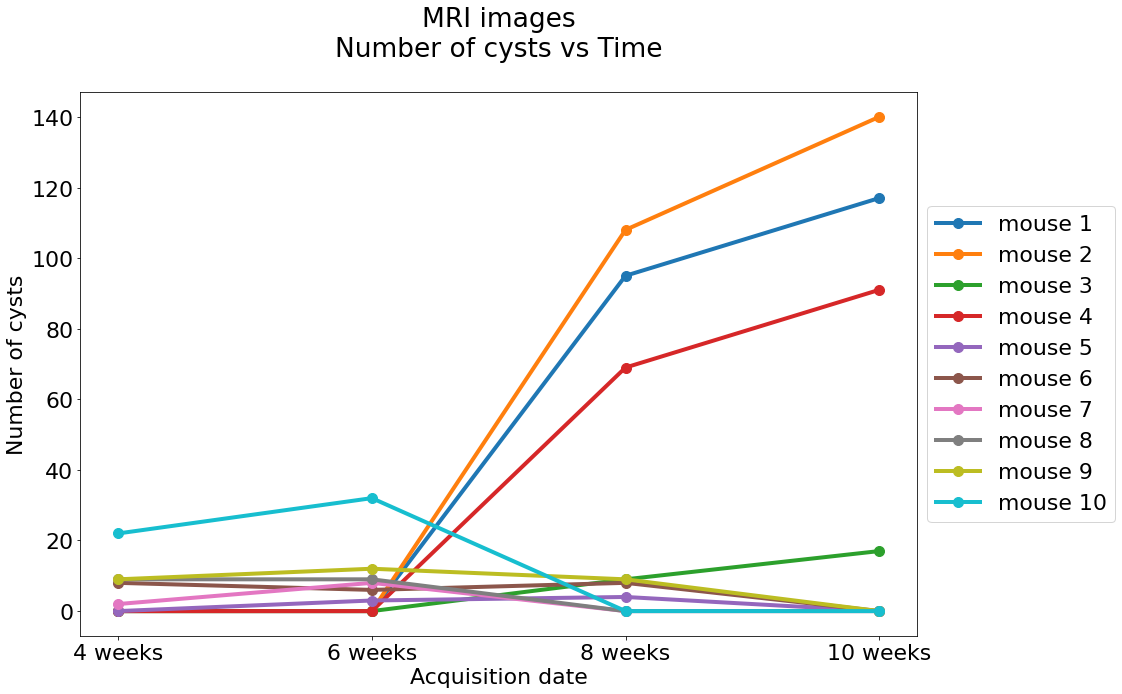

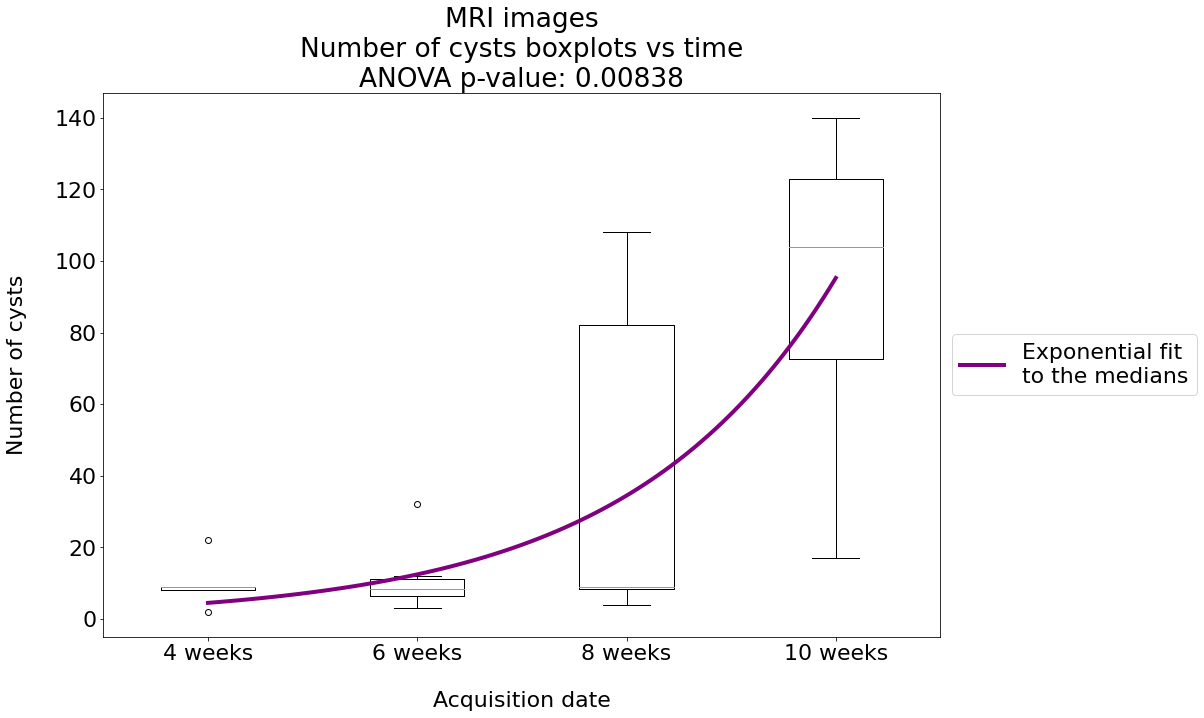

In [65]:
#Plotting all MRI results

figuresFolder = 'E:/AAV para enfermedades renales/Publications/CT+MRI+Histology/Images/NewGraphs/MRI'
saving = False

#MRI plot
plt.figure(figsize=(15,10))
for mouse in range(numCysts.shape[1]):
    lab = 'mouse '+str(mouse+1)
    data = numCysts[:,mouse]
    data=data[data!=0]
    plt.plot(numCysts[:,mouse],label=lab,marker='o', linewidth=4,markersize=10)
        
        

plt.ylabel('Number of cysts')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['4 weeks','6 weeks','8 weeks','10 weeks'])
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.title('MRI images\nNumber of cysts vs Time\n')
plt.savefig(figuresFolder+'/MRI_Number_of_cysts_vs_Time.png',bbox_inches='tight')




plt.figure(figsize=(15,10))
numCystsMedians = np.zeros(numCysts.shape[0])

for i in range(len(numCystsMedians)):
    numCystsMedians[i] = np.median(numCysts[i,numCysts[i,:]!=0])
    print('numCysts[i,numCysts[0,:]!=0]: ',numCysts[i,numCysts[0,:]!=0])
    print('numCystsMedians[i]: ',numCystsMedians[i])

numCysts_dict = {'4 weeks':numCysts[0,numCysts[0,:]!=0],\
                    '6 weeks':numCysts[1,numCysts[1,:]!=0],\
                    '8 weeks':numCysts[2,numCysts[2,:]!=0],\
                    '10 weeks':numCysts[3,numCysts[3,:]!=0]}

plt.boxplot(numCysts_dict.values(),positions=range(0,len(numCysts_dict)))

#Perform ANOVA for the MRI cysts
groups =  [i[np.logical_not(np.isnan(i))] for i in numCysts_dict.values()]
anovaResMRInumCysts = f_oneway(*groups)


xAxisVals = np.array([0,1,2,3])
mediansFit = np.polyfit(xAxisVals, np.log(numCystsMedians), 1, w=np.sqrt(numCystsMedians))
a = np.exp(mediansFit[1])
b = mediansFit[0]
x_fitted = np.linspace(np.min(xAxisVals), np.max(xAxisVals), 100)
y_fitted = a * np.exp(b * x_fitted)

plt.plot(x_fitted,y_fitted,label='Exponential fit\nto the medians',color = 'purple',linewidth=4)  
plt.title('MRI images\nNumber of cysts boxplots vs time\n')

plt.ylabel('Number of cysts\n')
plt.xlabel('\nAcquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['4 weeks','6 weeks','8 weeks','10 weeks'])
plt.title('MRI images\nNumber of cysts boxplots vs time\nANOVA p-value: '+str(anovaResMRInumCysts[1].astype('float16')))
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(1.32, 0.5))

if saving is True:
    plt.savefig(figuresFolder+'/MRI_Number_of_cysts_boxplots_vs_Time.png',bbox_inches='tight')




AGResMRInumCysts 4 weeks vs 6 weeks:  TtestResult(statistic=-0.30044498811765785, pvalue=0.770662146961592, df=9.0)
AGResMRInumCysts 6 weeks vs 8 weeks:  TtestResult(statistic=-1.6329601482545932, pvalue=0.13074656418400818, df=11.0)
AGResMRInumCysts 8 weeks vs 10 weeks:  TtestResult(statistic=-1.5808321501381803, pvalue=0.14837459511968817, df=9.0)



AGResMRInumCysts 4 weeks vs 6 weeks:  TtestResult(statistic=-0.9686856213630441, pvalue=0.35801168596600264, df=9.0)
AGResMRInumCysts 6 weeks vs 8 weeks:  TtestResult(statistic=-0.5709317632862774, pvalue=0.5795227279378308, df=11.0)
WelchResMRInumCysts 8 weeks vs 10 weeks:  TtestResult(statistic=-2.358842939293375, pvalue=0.042682211701263295, df=9.0)


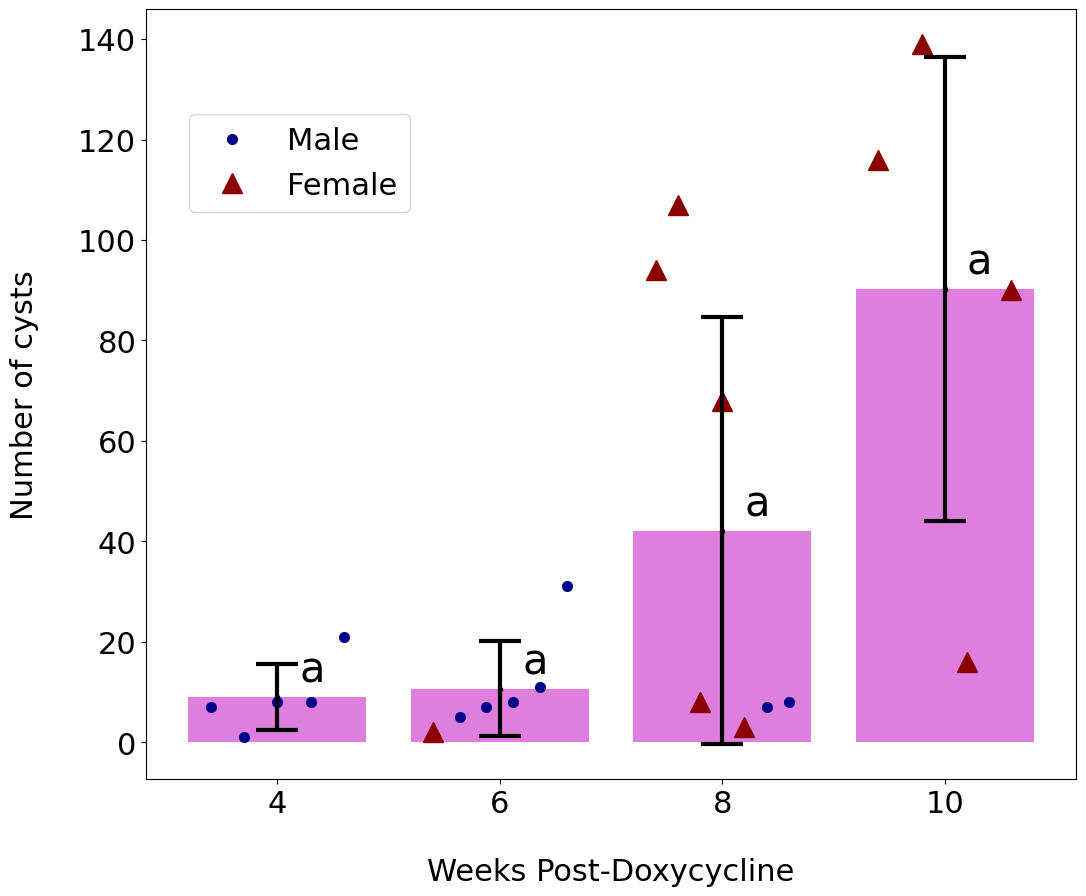

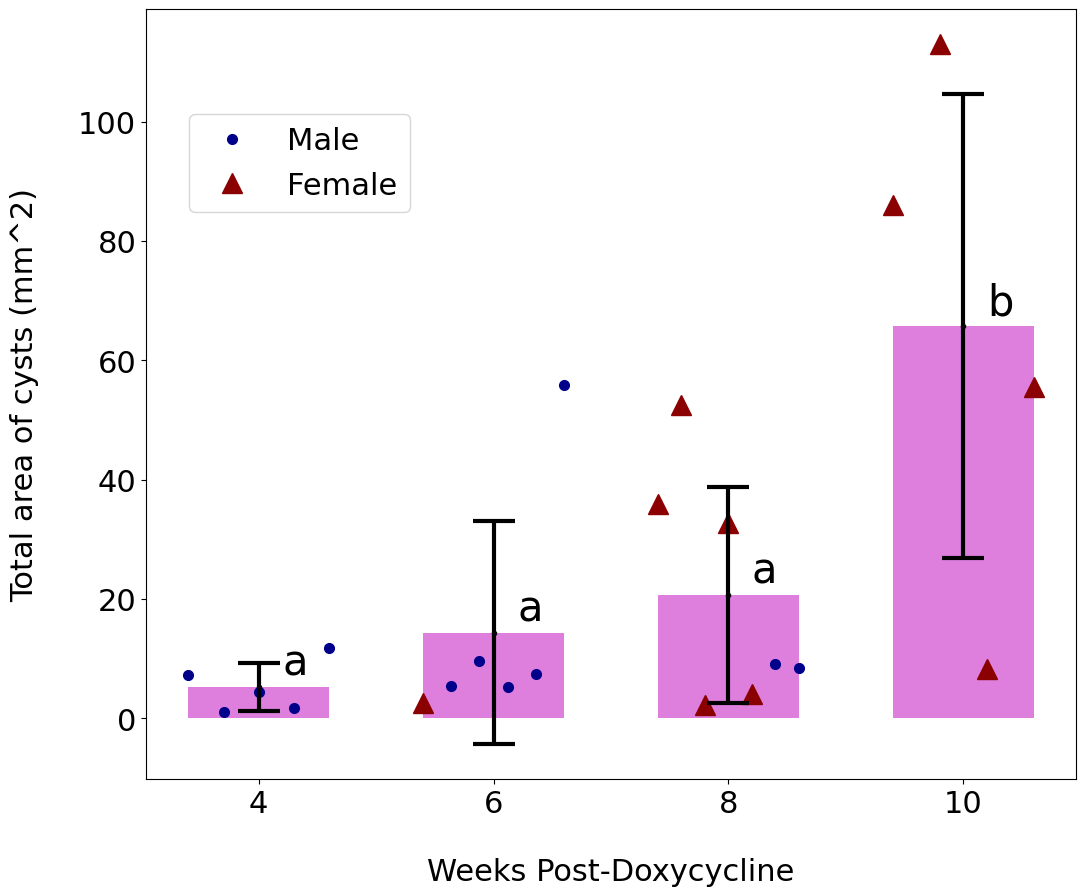

In [70]:
#VERSION 2 OF PLOTTING (SIMILAR TO RAFA'S)

#Plotting all MRI results

#Pixel size if 0.01 mm^2 per pixel (aprox, from the DICOMS)

from scipy.stats import alexandergovern
from scipy.stats import ttest_ind

figuresFolder = 'E:/AAV para enfermedades renales/Publications/CT+MRI+Histology/Images/NewGraphs/MRI'
saving = True

pixSize = 0.01

plt.figure(figsize=(12,10))

upOffset1 = 3
rightOffset1 = 0.1

numCystsMeans = np.zeros(numCysts.shape[0])
numCystsStd = np.zeros(numCysts.shape[0])
for i in range(len(numCystsMeans)):
    numCystsMeans[i] = np.mean(numCysts[i,numCysts[i,:]!=0])
    numCystsStd[i] = np.std(numCysts[i,numCysts[i,:]!=0])
    #Plot points around i
    numPoints = np.sum(numCysts[i,:]!=0)
    pointPosit = i + np.linspace(-0.25,0.25,numPoints)
    #plt.plot(pointPosit,numCysts[i,numCysts[i,:]!=0],'.',ms = 14,color = 'darkred')

    #Plot the points separated by female (first batch) and male (second batch)
    
    count = -1
    for j in range(numCysts.shape[1]):
    
        #If it is one of the females
        
        if numCysts[i,j]!=0 and j<=4:
            count+=1
            if count == 0 and i == 1:
                labelName = 'Female'
            else:
                labelName = ''
            plt.plot(pointPosit[count],numCysts[i,j],'^',ms = 14,color = 'darkred',label = labelName)
        elif numCysts[i,j]!=0 and j>4:
            if j == 5 and i == 0:
                labelName = 'Male'
            else:
                labelName = ''
            count+=1
            plt.plot(pointPosit[count],numCysts[i,j],'.',ms = 14,color = 'darkblue',label=labelName) 

numCysts_dict = {'4 weeks':numCysts[0,numCysts[0,:]!=0],\
                    '6 weeks':numCysts[1,numCysts[1,:]!=0],\
                    '8 weeks':numCysts[2,numCysts[2,:]!=0],\
                    '10 weeks':numCysts[3,numCysts[3,:]!=0]}

plt.bar([0,1,2,3],numCystsMeans,color='m',width = 0.6,alpha=0.5)
plt.errorbar([0,1,2,3],numCystsMeans,numCystsStd,fmt='.',elinewidth=3,capthick=3,errorevery=1,capsize = 15,color='black')

#Perform ANOVA for the MRI cysts
groups =  [i[np.logical_not(np.isnan(i))] for i in numCysts_dict.values()]

#AGResMRInumCysts =alexandergovern(*groups)

print('\n\n')

#print('AGResMRInumCysts: ',AGResMRInumCysts)

AGResMRInumCysts0_1 = ttest_ind(*[groups[0],groups[1]],equal_var=True)
print('AGResMRInumCysts 4 weeks vs 6 weeks: ',AGResMRInumCysts0_1)

AGResMRInumCysts1_2 = ttest_ind(*[groups[1],groups[2]],equal_var=True)
print('AGResMRInumCysts 6 weeks vs 8 weeks: ',AGResMRInumCysts1_2)

AGResMRInumCysts2_3 = ttest_ind(*[groups[2],groups[3]],equal_var=True)
print('AGResMRInumCysts 8 weeks vs 10 weeks: ',AGResMRInumCysts2_3)



xAxisPoints = np.array([0,1,2,3])

plt.ylabel('Number of cysts\n')
plt.xlabel('\nWeeks Post-Doxycycline')
plt.xticks(ticks=xAxisPoints,labels=['4','6','8','10'])

plt.text(xAxisPoints[0]+rightOffset1, numCystsMeans[0]+upOffset1 , 'a', fontsize = 30)
plt.text(xAxisPoints[1]+rightOffset1, numCystsMeans[1]+upOffset1 , 'a', fontsize = 30)
plt.text(xAxisPoints[2]+rightOffset1, numCystsMeans[2]+upOffset1 , 'a', fontsize = 30)
plt.text(xAxisPoints[3]+rightOffset1, numCystsMeans[3]+upOffset1 , 'a', fontsize = 30)

plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.3,0.8))

if saving is True:
    plt.savefig(figuresFolder+'/MRI_Number_of_cysts_vs_Time_bars.png',bbox_inches='tight')
    

plt.figure(figsize=(12,10))

upOffset2 = 2
rightOffset2 = 0.1


totAreaCystsMeans = np.zeros(totAreaCysts.shape[0])
totAreaCystsStd = np.zeros(totAreaCysts.shape[0])
for i in range(len(totAreaCystsMeans)):
    totAreaCystsMeans[i] = np.mean(pixSize*totAreaCysts[i,totAreaCysts[i,:]!=0])
    totAreaCystsStd[i] = np.std(pixSize*totAreaCysts[i,totAreaCysts[i,:]!=0])
    #Plot points around i
    numPoints = np.sum(totAreaCysts[i,:]!=0)
    pointPosit = i + np.linspace(-0.25,0.25,numPoints)
    #plt.plot(pointPosit,pixSize*totAreaCysts[i,totAreaCysts[i,:]!=0],'.',ms = 14,color = 'darkred')

    #Plot the points separated by female (first batch) and male (second batch)
    
    count = -1
    for j in range(totAreaCysts.shape[1]):
        
        #If it is one of the females
        
        if pixSize*totAreaCysts[i,j]!=0 and j<=4:
            
            count+=1
            if count == 0 and i == 1:
                labelName = 'Female'
            else:
                labelName = ''
            plt.plot(pointPosit[count],pixSize*totAreaCysts[i,j],'^',ms = 14,color = 'darkred',label=labelName)
        elif pixSize*totAreaCysts[i,j]!=0 and j>4:
            if j == 5 and i == 0:
                labelName = 'Male'
            else:
                labelName = ''
            count+=1
            plt.plot(pointPosit[count],pixSize*totAreaCysts[i,j],'.',ms = 14,color = 'darkblue',label=labelName) 


totAreaCysts_dict = {'4 weeks':pixSize*totAreaCysts[0,totAreaCysts[0,:]!=0],\
                    '6 weeks':pixSize*totAreaCysts[1,totAreaCysts[1,:]!=0],\
                    '8 weeks':pixSize*totAreaCysts[2,totAreaCysts[2,:]!=0],\
                    '10 weeks':pixSize*totAreaCysts[3,totAreaCysts[3,:]!=0]}

plt.bar(xAxisPoints,totAreaCystsMeans,color='m',width = 0.6,alpha=0.5)
plt.errorbar(xAxisPoints,totAreaCystsMeans,totAreaCystsStd,fmt='.',elinewidth=3,capthick=3,errorevery=1,capsize = 15,color='black')

#Perform ANOVA for the MRI cysts total area
groups =  [i[np.logical_not(np.isnan(i))] for i in totAreaCysts_dict.values()]
groups0_1 = [groups[0],groups[1]]
#AGResMRItotAreaCysts = alexandergovern(*groups)

print('\n\n')

#print('AGResMRItotAreaCysts: ',AGResMRItotAreaCysts)

AGResMRItotAreaCysts0_1 = ttest_ind(*[groups[0],groups[1]],equal_var=True)
print('AGResMRInumCysts 4 weeks vs 6 weeks: ',AGResMRItotAreaCysts0_1)

AGResMRItotAreaCysts1_2 = ttest_ind(*[groups[1],groups[2]],equal_var=True)
print('AGResMRInumCysts 6 weeks vs 8 weeks: ',AGResMRItotAreaCysts1_2)

AGResMRItotAreaCysts2_3 = ttest_ind(*[groups[2],groups[3]],equal_var=True)
print('WelchResMRInumCysts 8 weeks vs 10 weeks: ',AGResMRItotAreaCysts2_3)



plt.ylabel('Total area of cysts (mm^2)\n')
plt.xlabel('\nWeeks Post-Doxycycline')
plt.xticks(ticks=[0,1,2,3],labels=['4','6','8','10'])



plt.text(xAxisPoints[0]+rightOffset2, totAreaCystsMeans[0]+upOffset2 , 'a', fontsize = 30)
plt.text(xAxisPoints[1]+rightOffset2, totAreaCystsMeans[1]+upOffset2 , 'a', fontsize = 30)
plt.text(xAxisPoints[2]+rightOffset2, totAreaCystsMeans[2]+upOffset2 , 'a', fontsize = 30)
plt.text(xAxisPoints[3]+rightOffset2, totAreaCystsMeans[3]+upOffset2 , 'b', fontsize = 30)
plt.legend(labelcolor = 'black',loc='center right', bbox_to_anchor=(0.3,0.8))

if saving is True:
    plt.savefig(figuresFolder+'/MRI_Area_of_cysts_vs_Time_bars.png',bbox_inches='tight')

In [ ]:
#BREAK. Do not play the following cells










In [122]:
#Data 

#Reading full kidney and cysts masks, they can be binary or with 0 and 1

CTDataPath = 'E:/AAV para enfermedades renales/CT/Tanda 5 (2021-2022)'
#CTDataPath = 'E:/AAV para enfermedades renales/CT/Tanda 7 (2022-2023)'                          
#MRIDataPath = 'D:\AAV para enfermedades renales\Imágenes de CT y MR\MRI\Tanda 5 (2021-2022)'

#Folder with the resulting masks (from unet and postprocessing)
CTResultsPath = 'E:/AAV para enfermedades renales/Imagenes de CT y MR/Unet2D (CT)/inference'     

import tifffile as tiff
from glob import glob as glob
import os
import nrrd
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import ndimage

daysCT = glob(CTDataPath+'/*')

#Extract the number of folders inside the first day being analyzed (first folder alphabetically)
#ordered inside CTDataPath
numMice = len(glob(glob(CTDataPath+'/*')[0]+'/*'))

cysts = np.zeros([len(daysCT),numMice,2],dtype = int)
fullKidneys = np.zeros([len(daysCT),numMice],dtype = int)

#This variable will be used to store the number of control mice in the study


for dayCount,day in enumerate(daysCT):
    
    numControls = 0
    print('\n\n')
    print(os.path.basename(day))
     

    for mouseCount,mouse in enumerate(glob(day+'/*')):
           
        
        print('\n')
        print(os.path.basename(mouse))
        
        #fullKidneysMaskName = glob(CTResultsPath+'/'+os.path.basename(mouse)+'-Results.tif')
        
        fullKidneysMaskName = glob(mouse+'/*Corrected*fullKidneysMask*')
        
        #num will be defined now to set a position to store data inside the matrix
        mouseData = re.split('RATON',os.path.basename(fullKidneysMaskName[0]),flags=re.IGNORECASE)
            
        #If 'RATON' had the number attached
        if mouseData[1][0]!='_':
            
            ide = mouseData[1][0]  
            num=int(ide)

            print('num: ',num)
            
        else:
            #Else, pick the identifier (like C1), and then the number inside it
            ide=mouseData[1].split('_')[1]

            
            #If it is C1 or C2
            if ide[0]=='C':
                
                #Previous stored number of control mice
                prevNumControls = numControls
                #New number of controls, it will be the maximum number found between the controls
                numControls = np.max([numControls,int(ide[1])])
                #Control mice are first in the matrix
                #Move all entries to the right the adequate number of times
                #If there is anything already in that column
                dataLen = len(fullKidneys[dayCount,numControls:])
                fullKidneys[dayCount,numControls:] = \
                fullKidneys[dayCount,prevNumControls:prevNumControls+dataLen]

                cysts[dayCount,numControls:] = \
                cysts[dayCount,prevNumControls:prevNumControls+dataLen]                
                
                num = numControls
                print('num: ',num)
            else:
                #The rest of the mice (pathological) are moved to leave room for the controls at 
                #the beginning
                num = numControls + int(ide[1])
                print('num: ',num)
        
        print(num)
        

        
        
        
        #print('\t',os.path.basename(mouse))
        
        
        if fullKidneysMaskName != []:
            #print('\t\t',os.path.basename(fullKidneysMaskName[0]))       
            fullKidneysMask = tiff.imread(fullKidneysMaskName[0])
            
            #Create distance map
            distTransf = ndimage.morphology.distance_transform_edt(1*(fullKidneysMask>0))
            
            distTransf = distTransf
            #plt.figure()
            #plt.imshow(fullKidneysMask[:,:,300])
            #plt.figure()
            #plt.imshow(distTransf[:,:,300])
            
            #Calculate total kidneys volume
            totVol=np.sum(1*(fullKidneysMask>0))
            fullKidneys[dayCount,num-1]=totVol
            
            print(os.path.basename(fullKidneysMaskName[0]).split('-')[0]+'\n'+\
                      str(totVol))
            
            #plt.figure()
            #plt.title(os.path.basename(mouse)+'\n'+os.path.basename(fullKidneysMaskName[0])+'\n'+\
            #          str(totvol))
            #plt.imshow(fullKidneysMask[150,:,:])
            
            
        cystsMaskName = glob(mouse+'/*Corrected*cystsMask*')
        #cystsMaskName = glob(CTResultsPath+'/'+os.path.basename(mouse)+'-Results-diseased.tif')
        if cystsMaskName != []:
            #print('\t\t',os.path.basename(cystsMaskName[0]))
            
            cystsMask = tiff.imread(cystsMaskName[0])
            
            totDisVol=np.sum(1*(cystsMask>0))
            
            #Mean distance transform values within the cysts 
            distWeightedtotDisVol = np.sum(distTransf[cystsMask>0])/np.count_nonzero(distTransf[cystsMask>0])
            #print(distWeightedtotDisVol)
            
            #Delete the entries for C2, the only true control
            if ide[0]=='C' and ide[1]=='2':
                cysts[dayCount,num-1,0]=0
                cysts[dayCount,num-1,1]=0
            else:
                cysts[dayCount,num-1,0]=totDisVol
                cysts[dayCount,num-1,1]=distWeightedtotDisVol
            
            print(os.path.basename(cystsMaskName[0]).split('-')[0]+'\n'+\
                      str(totDisVol/totVol))
            #plt.figure()
            #plt.title(os.path.basename(mouse)+'\n'+os.path.basename(cystsMaskName[0])+'\n'+\
            #          str(totDisVol/totvol))
            #plt.imshow(cystsMask[180,:,:])
        
              
        print('fullKidneys ')
        print(fullKidneys)
        
        print('cysts[:,:,0] ')
        print(cysts[:,:,0])
        
        print('cysts[:,:,1] ')
        print(cysts[:,:,1])




04 - 26NOV21-PCKD+1control


TROPISMORENAL_RATON1_2I1D_26NOV21_26Nov2021_Acq001_ring
num:  1
1
inferenceCorrected
249146
fullKidneys 
[[249146      0      0      0      0      0]
 [     0      0      0      0      0      0]
 [     0      0      0      0      0      0]
 [     0      0      0      0      0      0]]
cysts[:,:,0] 
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
cysts[:,:,1] 
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


TROPISMORENAL_RATON2_1D_26NOV21_26Nov2021_Acq001_ring
num:  2
2
Corrected
207855
inferenceCorrected
0.027523995092732914
fullKidneys 
[[249146 207855      0      0      0      0]
 [     0      0      0      0      0      0]
 [     0      0      0      0      0      0]
 [     0      0      0      0      0      0]]
cysts[:,:,0] 
[[   0 5721    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]
cysts[:,:,1] 
[[0 5 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0

In [71]:
#Obtaining measures for the MRI cysts

#MRIDataPath = 'D:\AAV para enfermedades renales\Imágenes de CT y MR\MRI\Tanda 5 (2021-2022)'
MRIDataPath = 'E:/AAV para enfermedades renales/Imagenes de CT y MR/MRI/Tanda 7 (2022-2023)/'

cystsPropThTime = np.zeros([2,6,3])




daysMRI = glob(MRIDataPath+'/*')
for dayCountMRI,dayMRI in enumerate(daysMRI):
    print('\n\n')
    print(os.path.basename(dayMRI))
    for mouseCountMRI,mouseMRI in enumerate(glob(dayMRI+'/*')):
        print(os.path.basename(mouseMRI))
        num=re.split('RATON',os.path.basename(mouseMRI),flags=re.IGNORECASE)
        num=num[1]
        num=int(num[1])
        print(num)   
        
        fullKidneysMaskName = glob(mouseMRI+'/*fullKidneysMask*.tif*')
        cystsMaskName = glob(mouseMRI+'/*cystsMask*.tif*')
        
        if fullKidneysMaskName != []:
            fullKidneysMask = tiff.imread(fullKidneysMaskName[0])
            
            if cystsMaskName != []:
                cystsMask = tiff.imread(cystsMaskName[0])
            else:
                cystsMask = np.zeros(fullKidneysMask.shape,dtype=int)
                
            #Calculate diseased proportion slice by slice
            numSlices = fullKidneysMask.shape[0]
            
            cystsProps = list()
            cystsVols = list()
            totVols = list()
            
            for slice in range(numSlices):
                
                #Kidney volume in the slice
                totVol = np.sum(1*(fullKidneysMask[slice,:,:]>0))
                
                if totVol>0:
                    cystsVol = np.sum(1*(cystsMask[slice,:,:]>0))
                    cystProp = cystsVol/totVol
                    cystsProps.append(np.min([cystProp,1]))
                    cystsVols.append(cystsVol)
                    totVols.append(totVol)
                
            #print(cystsProps)
            #plt.figure()
            #plt.plot(cystsProps)
            
            cystsPropThTime[dayCountMRI,num-1,0] = np.mean(cystsProps)
            cystsPropThTime[dayCountMRI,num-1,1] = np.sum(cystsVols)/np.sum(totVols)
            #Number of cysts
            cystsPropThTime[dayCountMRI,num-1,2] = len(np.unique(cystsMask))-1
            print('Number of cysts: ',len(np.unique(cystsMask))-1)
            print(np.unique(cystsMask))
            print('\n')

            
print(cystsPropThTime)




15-16_12_2022
20221215_101448_TropismoRenal2020_raton_c2_1D_15dic22_Tropi_1_1


ValueError: invalid literal for int() with base 10: 'c'

iteration
iteration
iteration
iteration
iteration
iteration


Text(0.5, 1.0, 'MRI images\nNumber of cysts vs Time\n')

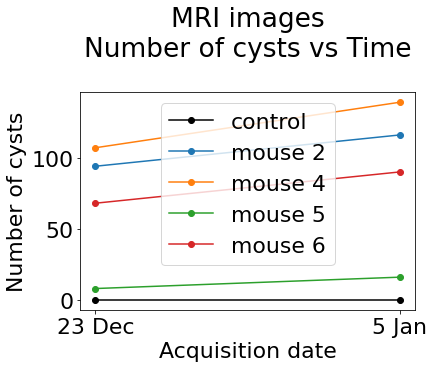

In [70]:
#MRI plot
plt.figure()
for mouse in range(cystsPropThTime.shape[1]):
    print('iteration')
    if mouse+1 != 3:
        if mouse+1 ==1:
            lab = 'control'
            col = 'black'
            plt.plot(cystsPropThTime[:,mouse,2],label=lab,color=col,marker='o')
        else:
            lab = 'mouse '+str(mouse+1)
            plt.plot(cystsPropThTime[:,mouse,2],label=lab,marker='o')

plt.ylabel('Number of cysts')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1],labels=['23 Dec','5 Jan'])
plt.legend()
plt.title('MRI images\nNumber of cysts vs Time\n')




ANOVA results
  Source             SS  DF            MS          F     p-unc       ng2  \
0   time  165352.015108   3  55117.338369  13.202342  0.001205  0.513967   
1  Error   37573.337167   9   4174.815241        NaN       NaN       NaN   

        eps  
0  0.412275  
1       NaN  

Post-hoc results
  Contrast   A   B  Paired  Parametric          T  dof alternative     p-unc  \
0     time  t0  t1    True        True -10.736684  3.0   two-sided  0.001728   
1     time  t0  t2    True        True  -9.903304  3.0   two-sided  0.002190   
2     time  t0  t3    True        True  -4.698484  3.0   two-sided  0.018237   
3     time  t1  t2    True        True  -1.955296  3.0   two-sided  0.145519   
4     time  t1  t3    True        True  -2.067146  3.0   two-sided  0.130599   
5     time  t2  t3    True        True  -1.554395  3.0   two-sided  0.217925   

     p-corr p-adjust    BF10    hedges  
0  0.006570   fdr_bh  22.527 -1.426808  
1  0.006570   fdr_bh  19.257 -2.125917  
2  0.036474 

c:\users\equipo\.conda\envs\workenvpy3.7\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


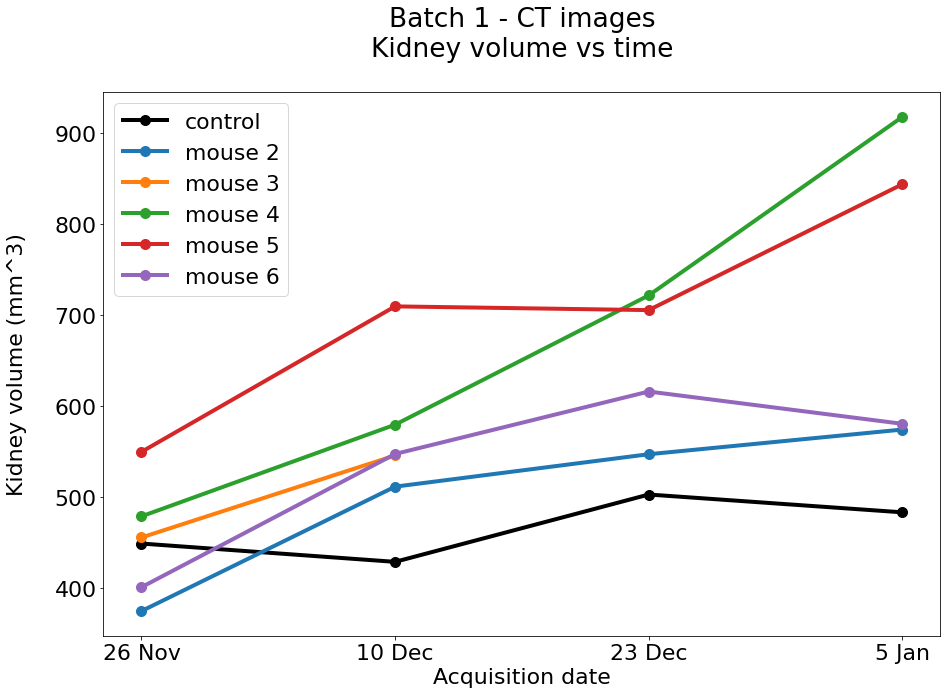

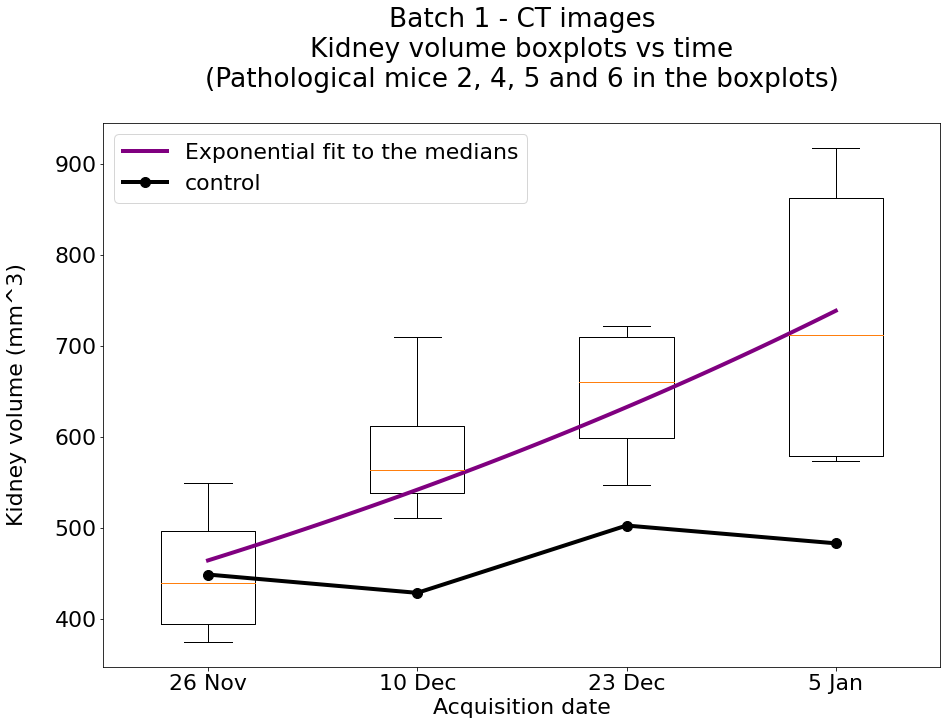

In [65]:
#Total kidney volume for CT images tanda 5 (2021-2022)

from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import pingouin as pg

#################################################################################


#Voxel size = (0.122 mm)^3 = 0.0018 mm^3
voxSize = 0.0018

#Change font size
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 22}

plt.rc('font', **font)


plt.figure(figsize=(15,10))
for mouse in range(fullKidneys.shape[1]):
    if mouse+1 ==1:
        lab = 'control'
        col = 'black'
        data = fullKidneys[:,mouse]
        data=data[data!=0]
        plt.plot(voxSize*data,label=lab,color = col,marker='o',linewidth=4,markersize=10)
    else:
        lab = 'mouse ' + str(mouse+1)
        data = fullKidneys[:,mouse]
        data=data[data!=0]
        plt.plot(voxSize*data,label=lab,marker='o', linewidth=4,markersize=10)

plt.legend()
plt.title('Batch 1 - CT images\nKidney volume vs time\n')
plt.ylabel('Kidney volume (mm^3)\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['26 Nov','10 Dec','23 Dec','5 Jan'])

plt.figure(figsize=(15,10))
fullKidneys_del = voxSize*np.delete(fullKidneys,[2,0],1)
fullKidneyMedians = np.median(fullKidneys_del,axis = 1)

df = pd.DataFrame(np.transpose(fullKidneys_del), columns = ['t0','t1','t2','t3'])
df['id']=['mouse1','mouse2','mouse3','mouse4']
df=pd.melt(df.reset_index(),id_vars=['id'],value_vars = ['t0','t1','t2','t3'])
df.columns = ['id','time','volume']
#from dfply import *
#df >> group_by(X.time) >> summarize(n=X.volume.count(), mean=X.volume.mean(), std=X.volume.std())
#ax=sns.boxplot(x='time',y='volume',data = df)
#plt.show()

anovaRes = pg.rm_anova(dv='volume',within='time',subject='id',data=df,detailed =True)
post_hncs = pg.pairwise_ttests(dv='volume',within='time',subject='id',padjust='fdr_bh',data=df)

fullKidneys_dict = {'26 Nov':fullKidneys_del[0,:],'10 Dec':fullKidneys_del[1,:],'23 Dec':fullKidneys_del[2,:],'5 Jan':fullKidneys_del[3,:]}
plt.boxplot(fullKidneys_dict.values(),positions=range(0,len(fullKidneys_dict)))


xAxisVals = np.array([0,1,2,3])
mediansFit = np.polyfit(xAxisVals, np.log(fullKidneyMedians), 1, w=np.sqrt(fullKidneyMedians))
a = np.exp(mediansFit[1])
b = mediansFit[0]
x_fitted = np.linspace(np.min(xAxisVals), np.max(xAxisVals), 100)
y_fitted = a * np.exp(b * x_fitted)
plt.plot(x_fitted,y_fitted,label='Exponential fit to the medians',color = 'purple',linewidth=4)  
plt.plot(voxSize*fullKidneys[:,0],label='control',color = col,marker='o',linewidth=4,markersize=10)
plt.legend()
plt.ylabel('Kidney volume (mm^3)\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['26 Nov','10 Dec','23 Dec','5 Jan'])
plt.title('Batch 1 - CT images\nKidney volume boxplots vs time\n(Pathological mice'+\
          ' 2, 4, 5 and 6 in the boxplots)\n')

print('\nANOVA results')
print(anovaRes)
print('\nPost-hoc results')
print(post_hncs)


ANOVA results
  Source           SS  DF           MS        F     p-unc       ng2      eps
0   time  7362.813646   3  2454.271215  8.07147  0.006402  0.564833  0.34922
1  Error  2736.606889   9   304.067432      NaN       NaN       NaN      NaN

Post-hoc results
  Contrast   A   B  Paired  Parametric         T  dof alternative     p-unc  \
0     time  t0  t1    True        True -1.681363  3.0   two-sided  0.191283   
1     time  t0  t2    True        True -2.351186  3.0   two-sided  0.100198   
2     time  t0  t3    True        True -2.881100  3.0   two-sided  0.063472   
3     time  t1  t2    True        True -2.231334  3.0   two-sided  0.111858   
4     time  t1  t3    True        True -2.925654  3.0   two-sided  0.061215   
5     time  t2  t3    True        True -3.369961  3.0   two-sided  0.043412   

     p-corr p-adjust   BF10    hedges  
0  0.191283   fdr_bh  0.961 -1.027352  
1  0.134229   fdr_bh  1.485 -1.401238  
2  0.126944   fdr_bh  2.025 -1.779789  
3  0.134229   fdr_bh  

c:\users\equipo\.conda\envs\workenvpy3.7\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


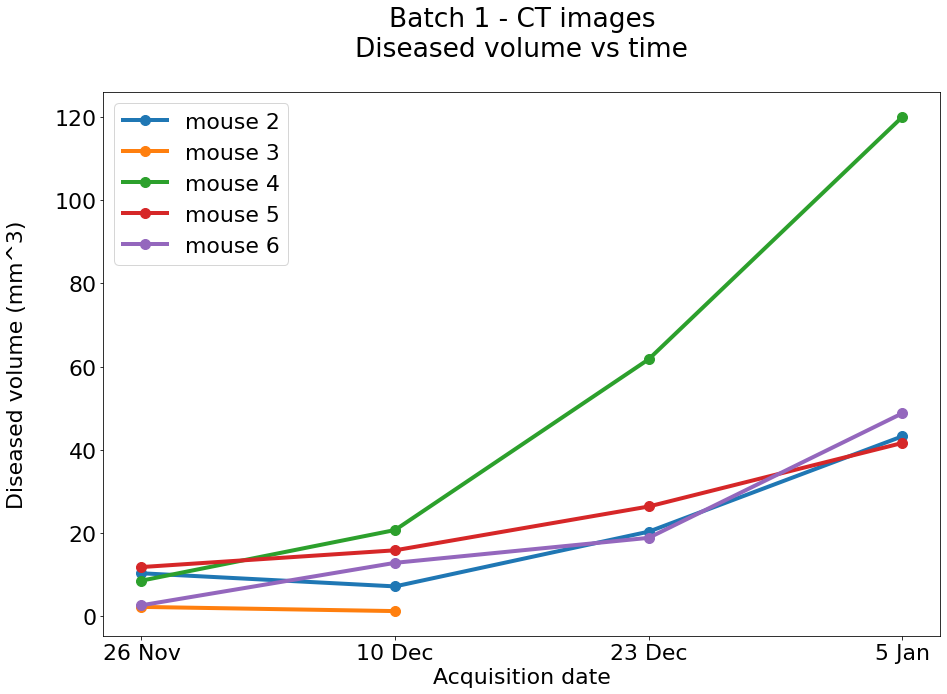

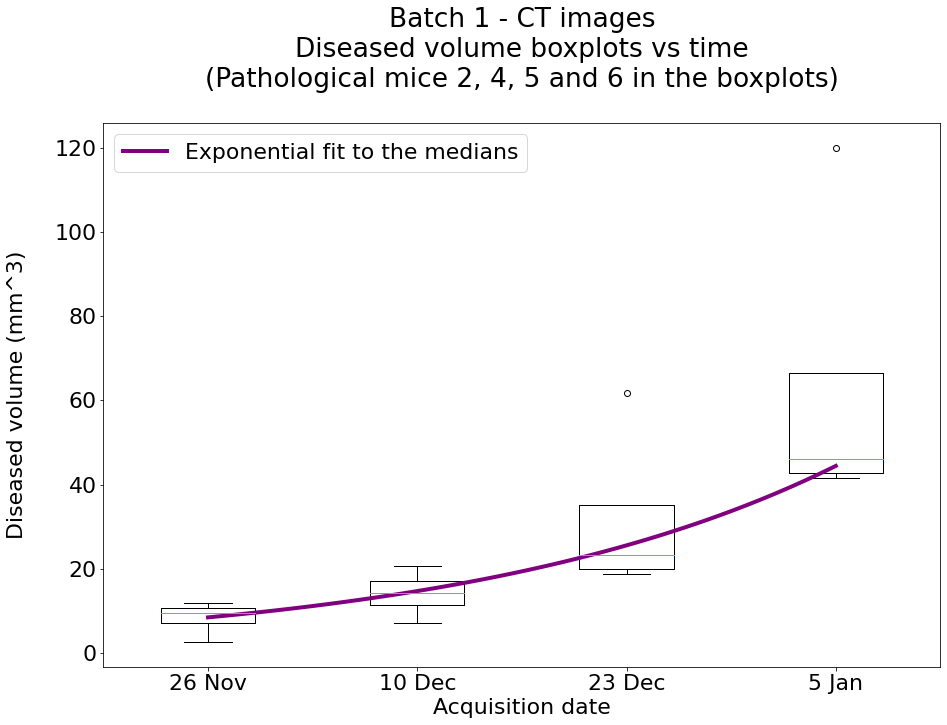

iteration
iteration
iteration
iteration
iteration
iteration


Text(0.5, 1.0, 'Mean distance of the diseased voxels\nto an edge of the kidney\n')

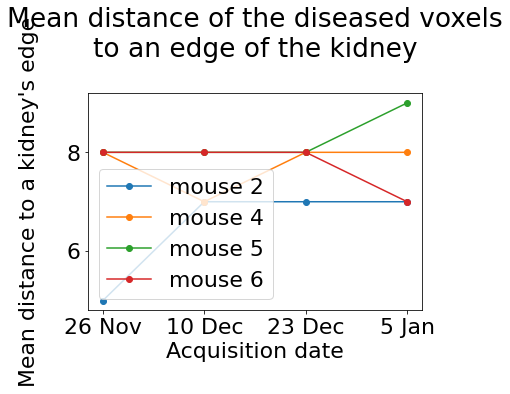

In [67]:
##################################################################################################
#Diseased volume for CT images tanda 5 (2021-2022)

import pandas as pd
import pingouin as pg

#Not the proportion but the direct diseased size
cystsProp = cysts[:,:,0]*voxSize

distances = cysts[:,:,1]

#Change font size
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 22}

plt.rc('font', **font)


plt.figure(figsize=(15,10))
for mouse in range(cysts.shape[1]):
    #For all mice but the control
    if not (mouse+1 ==1):
        lab = 'mouse ' + str(mouse+1)
        data = cystsProp[:,mouse]
        data=data[data!=0]
        plt.plot(data,label=lab, marker='o',linewidth=4,markersize=10)
plt.legend()
plt.title('Batch 1 - CT images\nDiseased volume vs time\n')
plt.ylabel('Diseased volume (mm^3)\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['26 Nov','10 Dec','23 Dec','5 Jan'])

plt.figure(figsize=(15,10))
cysts_del = np.delete(cystsProp,[2,0],1)
df = pd.DataFrame(np.transpose(cysts_del), columns = ['t0','t1','t2','t3'])
df['id']=['mouse1','mouse2','mouse3','mouse4']
df=pd.melt(df.reset_index(),id_vars=['id'],value_vars = ['t0','t1','t2','t3'])
df.columns = ['id','time','cystsProp']
#from dfply import *
#df >> group_by(X.time) >> summarize(n=X.volume.count(), mean=X.volume.mean(), std=X.volume.std())
#ax=sns.boxplot(x='time',y='volume',data = df)
#plt.show()

anovaRes = pg.rm_anova(dv='cystsProp',within='time',subject='id',data=df,detailed =True)
post_hncs = pg.pairwise_ttests(dv='cystsProp',within='time',subject='id',padjust='fdr_bh',data=df)

cystMedians = np.median(cysts_del,axis = 1)
cysts_dict = {'26 Nov':cysts_del[0,:],'10 Dec':cysts_del[1,:],'23 Dec':cysts_del[2,:],'5 Jan':cysts_del[3,:]}
plt.boxplot(cysts_dict.values(),positions=range(0,len(cysts_dict)))


xAxisVals = np.array([0,1,2,3])
mediansFit = np.polyfit(xAxisVals, np.log(cystMedians), 1, w=np.sqrt(cystMedians))
a = np.exp(mediansFit[1])
b = mediansFit[0]
x_fitted = np.linspace(np.min(xAxisVals), np.max(xAxisVals), 100)
y_fitted = a * np.exp(b * x_fitted)
plt.plot(x_fitted,y_fitted,label='Exponential fit to the medians',color = 'purple',linewidth=4)  
#plt.plot(cysts[:,0],label='control',color = 'black',marker='o')
plt.legend()

plt.ylabel('Diseased volume (mm^3)\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['26 Nov','10 Dec','23 Dec','5 Jan'])
plt.title('Batch 1 - CT images\nDiseased volume boxplots vs time\n(Pathological mice 2, 4, 5 and 6'+\
         ' in the boxplots)\n')

print('\nANOVA results')
print(anovaRes)
print('\nPost-hoc results')
print(post_hncs)

plt.show()

for mouse in range(distances.shape[1]):
    print('iteration')
    if (mouse+1 != 3) and (mouse+1 != 1):
        lab = 'mouse '+str(mouse+1)
        plt.plot(distances[:,mouse],label=lab,marker='o')

plt.legend()
plt.ylabel('Mean distance to a kidney\'s edge\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2,3],labels=['26 Nov','10 Dec','23 Dec','5 Jan'])
plt.title('Mean distance of the diseased voxels\nto an edge of the kidney\n')        


Medians, mouse6 
 [375.561  543.429  484.4448 506.799  433.08   433.3986]
Medians, mouse1 
 [378.0666 599.0634 601.2774 615.7152 522.7056 542.7396]
Medians, mouse2 
 [791.667  744.5934 643.4262]

ANOVA results
  Source             SS  DF            MS        F     p-unc  p-GG-corr  \
0   time   97540.697183   2  48770.348591  1.06186  0.381786   0.351137   
1  Error  459291.619761  10  45929.161976      NaN       NaN        NaN   

        ng2      eps sphericity   W-spher   p-spher  
0  0.101758  0.51033      False  0.040484  0.001639  
1       NaN      NaN        NaN       NaN       NaN  

Post-hoc results
  Contrast   A   B  Paired  Parametric         T  dof alternative     p-unc  \
0     time  t0  t1    True        True -4.465365  5.0   two-sided  0.006608   
1     time  t0  t2    True        True  0.651663  5.0   two-sided  0.543381   
2     time  t1  t2    True        True  1.205528  5.0   two-sided  0.281933   

     p-corr p-adjust   BF10    hedges  
0  0.019823   fdr_bh  9.435

c:\users\equipo\.conda\envs\workenvpy3.7\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


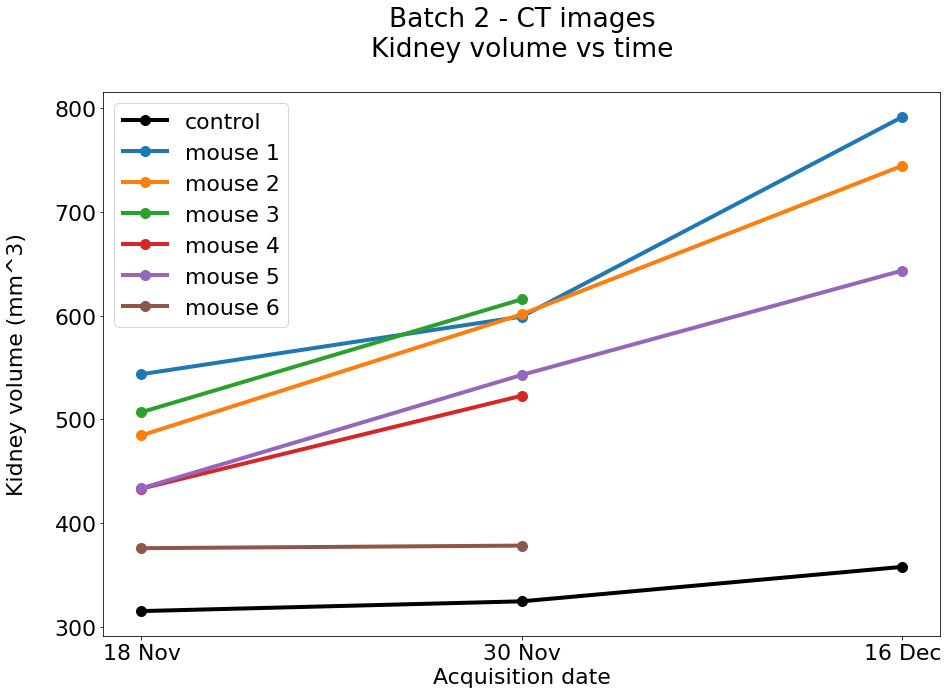

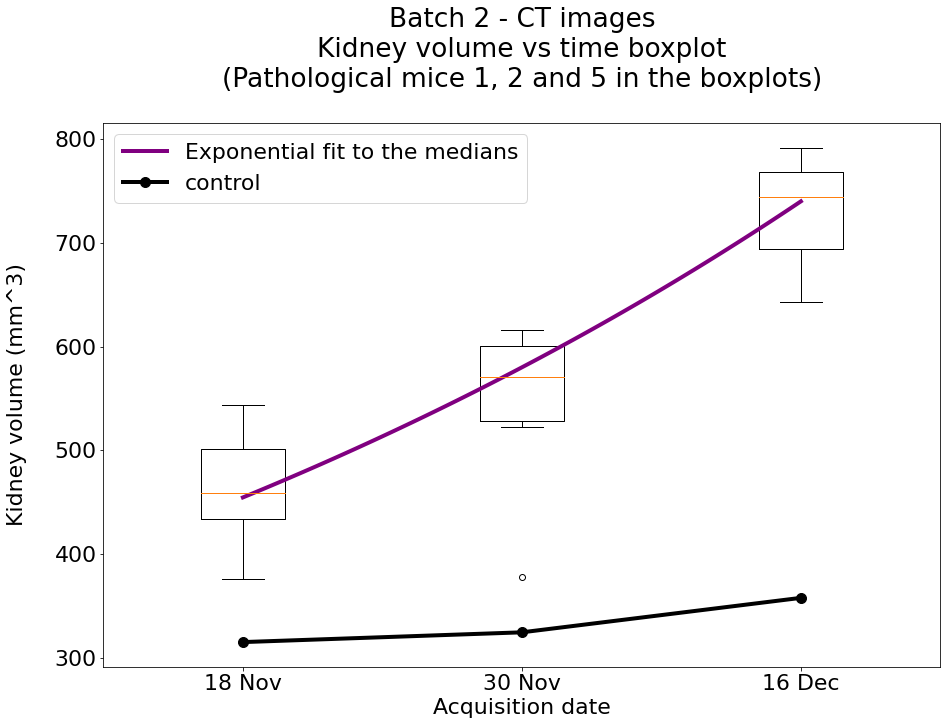

In [96]:
#Plot total kidney volume for CT images tanda 7 (2022-2023)

from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import pingouin as pg

#################################################################################


#Voxel size = (0.122 mm)^3 = 0.0018 mm^3
voxSize = 0.0018


#Change font size
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(15,10))
for mouse in range(fullKidneys.shape[1]):

    if mouse+1 == 2:
        lab = 'control'
        col = 'black'
            
        data = fullKidneys[:,mouse]
        data=data[data!=0]
            
        plt.plot(voxSize*data,label=lab,color = col,marker='o',linewidth=4,markersize=10)
        

        
    elif mouse+1 >= 3:
        lab = 'mouse ' + str(mouse-1)
        data = fullKidneys[:,mouse]
        data=data[data!=0]
        plt.plot(voxSize*data,label=lab,marker='o',linewidth=4,markersize=10)

lab = 'mouse 6'

data = fullKidneys[:,0]
data=data[data!=0]
plt.plot(voxSize*data,label=lab,marker='o',linewidth=4,markersize=10)

plt.legend()
plt.title('Batch 2 - CT images\nKidney volume vs time\n')
plt.ylabel('Kidney volume (mm^3)\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2],labels=['18 Nov','30 Nov','16 Dec'])

plt.figure(figsize=(15,10))

#We remove C2 since it is the only control. C1 will be called mouse 6
fullKidneys_del = voxSize*np.delete(fullKidneys,[1],1)



df = pd.DataFrame(np.transpose(fullKidneys_del), columns = ['t0','t1','t2'])
df['id']=['mouse6','mouse1','mouse2','mouse3','mouse4','mouse5']
df=pd.melt(df.reset_index(),id_vars=['id'],value_vars = ['t0','t1','t2'])
df.columns = ['id','time','volume']
#from dfply import *
#df >> group_by(X.time) >> summarize(n=X.volume.count(), mean=X.volume.mean(), std=X.volume.std())
#ax=sns.boxplot(x='time',y='volume',data = df)
#plt.show()

fullKidneyMedians = np.zeros(fullKidneys_del.shape[0])
for count,entry in enumerate(fullKidneyMedians):
    print('Medians,',count,'\n',fullKidneys_del[count,(fullKidneys_del[count,:]!=0)])
    fullKidneyMedians[count] = np.median(fullKidneys_del[count,(fullKidneys_del[count,:]!=0)])

anovaRes = pg.rm_anova(dv='volume',within='time',subject='id',data=df,detailed =True)
post_hncs = pg.pairwise_ttests(dv='volume',within='time',subject='id',padjust='fdr_bh',data=df)

fullKidneys_dict = {'18 Nov':fullKidneys_del[0,(fullKidneys_del[0,:]!=0)],\
                    '30 Nov':fullKidneys_del[1,(fullKidneys_del[1,:]!=0)],\
                    '16 Dec':fullKidneys_del[2,(fullKidneys_del[2,:]!=0)]}

plt.boxplot(fullKidneys_dict.values(),positions=range(0,len(fullKidneys_dict)))


xAxisVals = np.array([0,1,2])
mediansFit = np.polyfit(xAxisVals, np.log(fullKidneyMedians), 1, w=np.sqrt(fullKidneyMedians))
a = np.exp(mediansFit[1])
b = mediansFit[0]
x_fitted = np.linspace(np.min(xAxisVals), np.max(xAxisVals), 100)
y_fitted = a * np.exp(b * x_fitted)
plt.plot(x_fitted,y_fitted,label='Exponential fit to the medians',color = 'purple',linewidth=4)  
plt.plot(voxSize*fullKidneys[:,1],label='control',color = col,marker='o',linewidth=4,markersize=10)
plt.legend()
plt.ylabel('Kidney volume (mm^3)\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2],labels=['18 Nov','30 Nov','16 Dec'] )
plt.title('Batch 2 - CT images\nKidney volume vs time boxplot\n(Pathological mice 1, 2 and 5'+\
         ' in the boxplots)\n')

print('\nANOVA results')
print(anovaRes)
print('\nPost-hoc results')
print(post_hncs)

In [11]:
##################################################################################################
#Plot diseased volume proportion for tanda 7 (2022-2023)

#Voxel size = (0.122 mm)^3 = 0.0018 mm^3
voxSize = 0.0018

import pandas as pd
import pingouin as pg

#Trying with the cyst sizes directly instead of the proportion
cystsProp = cysts[:,:,0]*voxSize
#cystsProp = cysts[:,:,0]/fullKidneys

distances = cysts[:,:,1]


#Change font size
font = {'weight' : 'light',
        'size'   : 22}

plt.rc('font', **font)

plt.figure(figsize=(15,10))
for mouse in range(cysts.shape[1]):
           
    if mouse+1==2:
        lab = 'control'
        col = 'black'
        plt.plot(cystsProp[cystsProp[:,mouse]!=0,mouse],label=lab,color = col, marker='o',\
                linewidth=4,markersize=10)
    elif mouse+1>=3:
        lab = 'mouse ' + str(mouse-1)
        plt.plot(cystsProp[cystsProp[:,mouse]!=0,mouse],label=lab, marker='o',\
                 linewidth=4,markersize=10)

lab = 'mouse 6'
plt.plot(cystsProp[cystsProp[:,0]!=0,0],label=lab,marker='o',\
            linewidth=4,markersize=10)
        
plt.legend()
plt.title('Batch 2 - CT images\nDiseased volume vs time\n')
plt.ylabel('Diseased volume (mm^3)\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2],labels=['18 Nov','30 Nov','16 Dec'])

plt.figure(figsize=(15,10))
cysts_del = np.delete(cystsProp,[1],1)
df = pd.DataFrame(np.transpose(cysts_del), columns = ['t0','t1','t2'])
df['id']=['mouse2.6','mouse2.1','mouse2.2','mouse2.3','mouse2.4','mouse2.5']
df=pd.melt(df.reset_index(),id_vars=['id'],value_vars = ['t0','t1','t2'])
df.columns = ['id','time','cystsProp']
#from dfply import *
#df >> group_by(X.time) >> summarize(n=X.volume.count(), mean=X.volume.mean(), std=X.volume.std())
#ax=sns.boxplot(x='time',y='volume',data = df)
#plt.show()



anovaRes = pg.rm_anova(dv='cystsProp',within='time',subject='id',data=df,detailed =True)
post_hncs = pg.pairwise_ttests(dv='cystsProp',within='time',subject='id',padjust='fdr_bh',data=df)


cysts_dict = {'18 Nov':cysts_del[0,(cysts_del[0,:]!=0)],\
              '30 Nov':cysts_del[1,(cysts_del[1,:]!=0)],\
              '16 Dec':cysts_del[2,(cysts_del[2,:]!=0)]}
plt.boxplot(cysts_dict.values(),positions=range(0,len(cysts_dict)))

cystMedians = np.zeros(cysts_del.shape[0])
for count,entry in enumerate(cystMedians):
    print('Medians,',df['id'][count],'\n',cysts_del[count,(cysts_del[count,:]!=0)])
    cystMedians[count] = np.median(cysts_del[count,(cysts_del[count,:]!=0)])



xAxisVals = np.array([0,1,2])
mediansFit = np.polyfit(xAxisVals, np.log(cystMedians), 1, w=np.sqrt(cystMedians))
a = np.exp(mediansFit[1])
b = mediansFit[0]
x_fitted = np.linspace(np.min(xAxisVals), np.max(xAxisVals), 100)
y_fitted = a * np.exp(b * x_fitted)
plt.plot(x_fitted,y_fitted,label='Exponential fit to the medians',color = 'purple',linewidth=4)  

plt.legend()

plt.ylabel('Diseased volume (mm^3)\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2],labels=['18 Nov','30 Nov','16 Dec'])
plt.title('Batch 2 - CT images\nDiseased volume vs time boxplot\n(Pathological mice 1,2 and 5'+\
          ' in the boxplots)\n')

print('\nANOVA results')
print(anovaRes)
print('\nPost-hoc results')
print(post_hncs)

plt.show()

for mouse in range(distances.shape[1]):
    print('iteration')
    if (mouse+1 != 3) and (mouse+1 != 1):
        lab = 'mouse '+str(mouse+1)
        plt.plot(distances[:,mouse],label=lab,marker='o')

plt.legend()
plt.ylabel('Mean distance to a kidney\'s edge\n')
plt.xlabel('Acquisition date')
plt.xticks(ticks=[0,1,2],labels=['18 Nov','30 Nov','16 Dec'])
plt.title('Mean distance of the diseased voxels\nto an edge of the kidney\n')        


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed